In [142]:
from astropy.io import fits
import numpy as np
from os.path import join
#import subprocess
from numpy import random
import sys,os
#env_setup_path=os.environ.get('HEADAS') + '/headas-init.sh'
#subprocess.run(f"source {env_setup_path}", shell=True, executable='/bin/bash', check=True)
from xspec import *
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits as pyfits



density=21
logxi=1
datype="n{}_logxi_{}".format(density,logxi)
#specnnum="3"
bN=5000
skip=(bN+2)*0
h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12


rpatho=join("/disk/bifrost/yuanze/xillver_res/ktbb1",datype+"_bin5000")
#rpatho=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_testrepo",datype+"_i20")

#rpatho=join("/disk/bifrost/yuanze/xillver_res/ktbb1",datype)
rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_testrepo",datype)
#rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2",datype)
rpath3=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_modified",datype)
#rpath3=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_testrepo/",datype+"_h300")
#rpath3="/disk/bifrost/yuanze/software/XILLVER"
specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0)
if len(specE1)>13*bN:
    ite=14
else:
    print("ite=0")
    ite=0

skip=(bN+2)*ite
itrans=200
specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
foutdE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=4,max_rows=bN,skiprows=skip)
fraction1=np.loadtxt(join(rpatho,"current/fractions"))
#fionizE11=np.loadtxt(join(rpatho,"prevfullspec"),usecols=2,max_rows=bN,skiprows=bN*0+1)
depth1=np.loadtxt(join(rpatho,"current/temper"),usecols=0,max_rows=itrans,skiprows=0)
tempeV1=np.loadtxt(join(rpatho,"current/temper"),usecols=1,max_rows=itrans,skiprows=(itrans+2)*ite)
temp1=tempeV1*eV/kb
htcomp1=np.loadtxt(join(rpatho,"current/partht"),usecols=0,max_rows=itrans,skiprows=itrans*ite)
clcomp1=np.loadtxt(join(rpatho,"current/partht"),usecols=1,max_rows=itrans,skiprows=itrans*ite)
htfreef1=np.loadtxt(join(rpatho,"current/partht"),usecols=2,max_rows=itrans,skiprows=itrans*ite)
clfreef1=np.loadtxt(join(rpatho,"current/partht"),usecols=3,max_rows=itrans,skiprows=itrans*ite)
#clrec1=np.loadtxt(join(rpatho,"current/partht"),usecols=4)
#cllines1=np.loadtxt(join(rpatho,"current/partht"),usecols=4)
cooling1=np.loadtxt(join(rpatho,"current/cooling"),max_rows=itrans,skiprows=itrans*ite)
heating1=np.loadtxt(join(rpatho,"current/heating"),max_rows=itrans,skiprows=itrans*ite)


specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0)
if len(specE2)>13*bN:
    ite=14
else:
    ite=6

skip=(bN+2)*ite
itrans=200
specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutE2=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizE2=np.loadtxt(join(rpath,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
foutdE2=np.loadtxt(join(rpath,"current/spectr"),usecols=4,max_rows=bN,skiprows=skip)
fraction2=np.loadtxt(join(rpath,"current/fractions"),max_rows=itrans,skiprows=itrans*ite)
depth2=np.loadtxt(join(rpath,"current/temper"),usecols=0,max_rows=itrans,skiprows=(itrans+2)*ite)
tempeV2=np.loadtxt(join(rpath,"current/temper"),usecols=1,max_rows=itrans,skiprows=(itrans+2)*ite)
temp2=tempeV2*eV/kb
htcomp2=np.loadtxt(join(rpath,"current/partht"),usecols=0,max_rows=itrans,skiprows=itrans*ite)
clcomp2=np.loadtxt(join(rpath,"current/partht"),usecols=1,max_rows=itrans,skiprows=itrans*ite)
htfreef2=np.loadtxt(join(rpath,"current/partht"),usecols=2,max_rows=itrans,skiprows=itrans*ite)
clfreef2=np.loadtxt(join(rpath,"current/partht"),usecols=3,max_rows=itrans,skiprows=itrans*ite)
cooling2=np.loadtxt(join(rpath,"current/cooling"),max_rows=itrans,skiprows=itrans*ite)
heating2=np.loadtxt(join(rpath,"current/heating"),max_rows=itrans,skiprows=itrans*ite)




specE3=np.loadtxt(join(rpath3,"current/spectr"),usecols=0)
if len(specE3)>13*bN:
    ite=14
else:
    ite=2

skip=(bN+2)*ite
itrans=200
specE3=np.loadtxt(join(rpath3,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
foutE3=np.loadtxt(join(rpath3,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
fionizE3=np.loadtxt(join(rpath3,"current/spectr"),usecols=5,max_rows=bN,skiprows=skip)
foutdE3=np.loadtxt(join(rpath3,"current/spectr"),usecols=4,max_rows=bN,skiprows=skip)
fraction3=np.loadtxt(join(rpath3,"current/fractions"),max_rows=itrans,skiprows=itrans*ite)
depth3=np.loadtxt(join(rpath3,"current/temper"),usecols=0,max_rows=itrans,skiprows=(itrans+2)*ite)
tempeV3=np.loadtxt(join(rpath3,"current/temper"),usecols=1,max_rows=itrans,skiprows=(itrans+2)*ite)
temp3=tempeV3*eV/kb
htcomp3=np.loadtxt(join(rpath3,"current/partht"),usecols=0,max_rows=itrans,skiprows=itrans*ite)
clcomp3=np.loadtxt(join(rpath3,"current/partht"),usecols=1,max_rows=itrans,skiprows=itrans*ite)
htfreef3=np.loadtxt(join(rpath3,"current/partht"),usecols=2,max_rows=itrans,skiprows=itrans*ite)
clfreef3=np.loadtxt(join(rpath3,"current/partht"),usecols=3,max_rows=itrans,skiprows=itrans*ite)
cooling3=np.loadtxt(join(rpath3,"current/cooling"),max_rows=itrans,skiprows=itrans*ite)
heating3=np.loadtxt(join(rpath3,"current/heating"),max_rows=itrans,skiprows=itrans*ite)


#with warnings.catch_warnings():
    #warnings.filterwarnings('ignore', r'will not be counted towards `max_rows=')

#fionizE22=np.loadtxt(join(rpath,"prevfullspec"),usecols=2,max_rows=bN,skiprows=bN*0+1)
#fionizE22in=np.loadtxt(join(rpath,"current/fioniz_in2"),usecols=1,max_rows=bN,skiprows=0)
#rpath82=join("/disk/bifrost/yuanze/xillver_res/ktbb1_no82",datype)
#specE3=np.loadtxt(join(rpath,"current/spectr_last"),usecols=0,max_rows=bN,skiprows=skip)
#foutE3=np.loadtxt(join(rpath,"current/spectr_last"),usecols=1,max_rows=bN,skiprows=skip)
#fionizE3=np.loadtxt(join(rpath,"current/spectr_last"),usecols=5,max_rows=bN,skiprows=skip)


#specnnum=4
#rxinput=np.loadtxt("/disk/bifrost/yuanze/reflionx/reflionx_HD_nthcomp_v1_spec%s_output.dat"%specnnum).T
rxinput2=np.loadtxt("/disk/bifrost/yuanze/reflionx/n21_logxi_1/spec").T
rxtemp2=np.loadtxt("/disk/bifrost/yuanze/reflionx/n21_logxi_1/temp").T
rxfrac_Fe2=np.loadtxt("/disk/bifrost/yuanze/reflionx/n21_logxi_1/frac_Fe").T
rxfrac_O2=np.loadtxt("/disk/bifrost/yuanze/reflionx/n21_logxi_1/frac_O").T

rxflux=np.trapz(rxinput2[1]/rxinput2[0],x=rxinput2[0]*1e3*eV)
rxfac=10**logxi/(4*np.pi*rxflux/(1.2*10**int(density)))


print(rxfac)
#fspecE=np.loadtxt(join(rpath,"fullspec"),usecols=1,max_rows=500,skiprows=1)
#fIout=np.loadtxt(join(rpath,"fullspec"),usecols=2,max_rows=500,skiprows=1)

1.2000407934155288e+20


In [143]:
# Calculate the bin edges for each new bin by taking the first and last points in each group of 10
bin_edges1 = np.concatenate((specE1[::5], [specE1[-1]]))
bin_edges2 = np.concatenate((specE2[::5], [specE2[-1]]))
bin_edges3 = np.concatenate((specE3[::5], [specE3[-1]]))


# Initialize an array to hold the integrated values for each new bin
new_fout1 = np.zeros(len(bin_edges1)-1)
new_fout2 = np.zeros(len(bin_edges2)-1)
new_fion2 = np.zeros(len(bin_edges2)-1)
new_fout3 = np.zeros(len(bin_edges3)-1)

# Perform the integration over each set of 10 points
for i in range(len(bin_edges2)-1):
    # Find the indices in the original array corresponding to the current bin
    indices = np.where((specE2 >= bin_edges2[i]) & (specE2 < bin_edges2[i+1]))[0]
    
    # If your data represents a continuous distribution, use a method like the trapezoidal rule to integrate
    new_fout1[i] = np.trapz(foutE1[indices], eV*specE1[indices])/(bin_edges1[i]+bin_edges1[i+1])/eV*2
    new_fout2[i] = np.trapz(foutE2[indices], eV*specE2[indices])/(bin_edges2[i]+bin_edges2[i+1])/eV*2
    new_fion2[i] = np.trapz(fionizE2[indices], eV*specE2[indices])/(bin_edges2[i]+bin_edges2[i+1])/eV*2
    new_fout3[i] = np.trapz(foutE3[indices], eV*specE3[indices])/(bin_edges3[i]+bin_edges3[i+1])/eV*2

# The new grid points can be the midpoints of bin_edges or any other representative point
new_specE1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
new_specE2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
new_specE3 = (bin_edges3[:-1] + bin_edges3[1:]) / 2

#np.savetxt("./pub3/specE_n{}_logxi_{}.txt".format(density,logxi),new_specE.T/1e3)

In [144]:
fx=np.trapz(new_fout2, eV*new_specE2)
fion=np.trapz(new_fion2, eV*new_specE2)

#fx=np.trapz(new_fout, eV*new_specE)
#fion=np.trapz(fionizE2, eV*specE2)
facx=10**logxi/(fion*4*np.pi/(1.2*10**int(density)))
print(facx)
print(logxi,density)
print(fx*4*np.pi/(1.2*10**int(density)))
print(fion*4*np.pi/(1.2*10**int(density)))

72.97251505516076
1 21
0.13102119685319846
0.13703789697313962


In [183]:


# Clean the figure
plt.clf()

lw = 2   # Line widths throughout the plot
fsz = 16 # Font size throughout the plot

plt.rc('axes', labelsize=14)  # fontsize of the x any y labels

# Load local models
#AllModels.lmod("relxill")

# Energies
#AllModels.setEnergies("1e-2 1000. 1000 log")
AllModels.setEnergies("/disk/bifrost/yuanze/my_work/pub3/specE_n{}_logxi_{}.txt".format(density,logxi))
# Define the Model
m1 = Model("atable{/disk/bifrost/yuanze/reflionx/reflionx_HD_nthcomp_v2.fits}")
Xset.abund="grsa"
print(density)
print(logxi)
m1(1).values = "1.E+{}".format(density)      # reflionx density
m1(2).values = "{}".format(10**logxi)     # reflionx   logxi
m1(3).values = "1.0"      # reflionx   A_Fe
m1(4).values = "100."   # reflionx kT_e
m1(5).values = "2.0"   # reflionx gamma
m1(6).values = "0.100001"   # reflionx kT_bb
m1(8).values = "1.0"   # reflionx norm

Plot("emodel")
rx = np.array(Plot.x())
rxmo = np.array(Plot.model())
flux=np.trapz(rxmo*1e3*eV,rx)

fac=10**logxi/(4*np.pi*flux/(1.2*10**int(density)))
print(flux*fac)
#Plot("emodel")
#rx = np.array(Plot.x())
#rxmo = np.array(Plot.model())

AllModels.show()
#m1(3).values = "0"
#Plot("eemodel")
#xorgvals = Plot.x()
#yorgvals = Plot.model()


Models will now use energy array read from file: /disk/bifrost/yuanze/my_work/pub3/specE_n21_logxi_1.txt

21
1

Model atable{/disk/bifrost/yuanze/reflionx/reflionx_HD_nthcomp_v2.fits}<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   REFLIONX   Density             5.50000E+18  +/-  0.0          
   2    1   REFLIONX   Xi                  293.776      +/-  0.0          
   3    1   REFLIONX   A_Fe                1.69901      +/-  0.0          
   4    1   REFLIONX   kT_e                76.1908      +/-  0.0          
   5    1   REFLIONX   gamma               2.00050      +/-  0.0          
   6    1   REFLIONX   kT_bb               0.387298     +/-  0.0          
   7    1   REFLIONX   z                   0.0          frozen
   8    1   REFLIONX   norm                1.00000      +/-  0.0          
________________________________________________________________________


***Warning: Magnitudes of parameters in model for data group 1

<Figure size 350x262.5 with 0 Axes>

In [140]:


# Clean the figure
plt.clf()

lw = 2   # Line widths throughout the plot
fsz = 16 # Font size throughout the plot

plt.rc('axes', labelsize=14)  # fontsize of the x any y labels

# Load local models
#AllModels.lmod("relxill")

# Energies
AllModels.setEnergies("1e-3 1000. 1000 log")
#AllModels.setEnergies("/disk/bifrost/yuanze/my_work/pub3/specE_n{}_logxi_{}.txt".format(density,logxi))
# Define the Model
m1 = Model("nthcomp")
#Xset.abund="grsa"
print(density)
print(logxi)
m1(1).values = "2.0"      # Gamma
m1(2).values = "300"     # kT_e
m1(3).values = "0.01"      #   kT_bb
#m1(3).values = "0"      #   inp_type
m1(6).values = "1.0"   # norm

Plot("emodel")
nthx = np.array(Plot.x())
nthmo = np.array(Plot.model())

flux=np.trapz(nthmo*1e3*eV,nthx)
nthfac=10**logxi/(4*np.pi*flux/(1.2*10**int(density)))

#Plot("emodel")
#rx = np.array(Plot.x())
#rxmo = np.array(Plot.model())

AllModels.show()
#m1(3).values = "0"
#Plot("eemodel")
#xorgvals = Plot.x()
#yorgvals = Plot.model()

21
1

Models will now use energy array created from:
   0.001 - 1000   1000 log bins


Model nthComp<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   nthComp    Gamma               1.70000      +/-  0.0          
   2    1   nthComp    kT_e       keV      100.000      +/-  0.0          
   3    1   nthComp    kT_bb      keV      0.100000     frozen
   4    1   nthComp    inp_type   0/1      0.0          frozen
   5    1   nthComp    Redshift            0.0          frozen
   6    1   nthComp    norm                1.00000      +/-  0.0          
________________________________________________________________________


Parameters defined:
Model nthComp<1> Source No.: 1   Active/Off
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   nthComp    Gamma               2.00000      +/-  0.0          
   2    1   nthComp    kT_e       keV      300.000      +/-  0.0          
   3    1   nthComp    kT_bb      keV      1.0

<Figure size 350x262.5 with 0 Axes>

Text(0.05, 0.87, 'Log$[\\,\\xi/$erg$\\,$cm$\\,$s$^{-1}]=1 $')

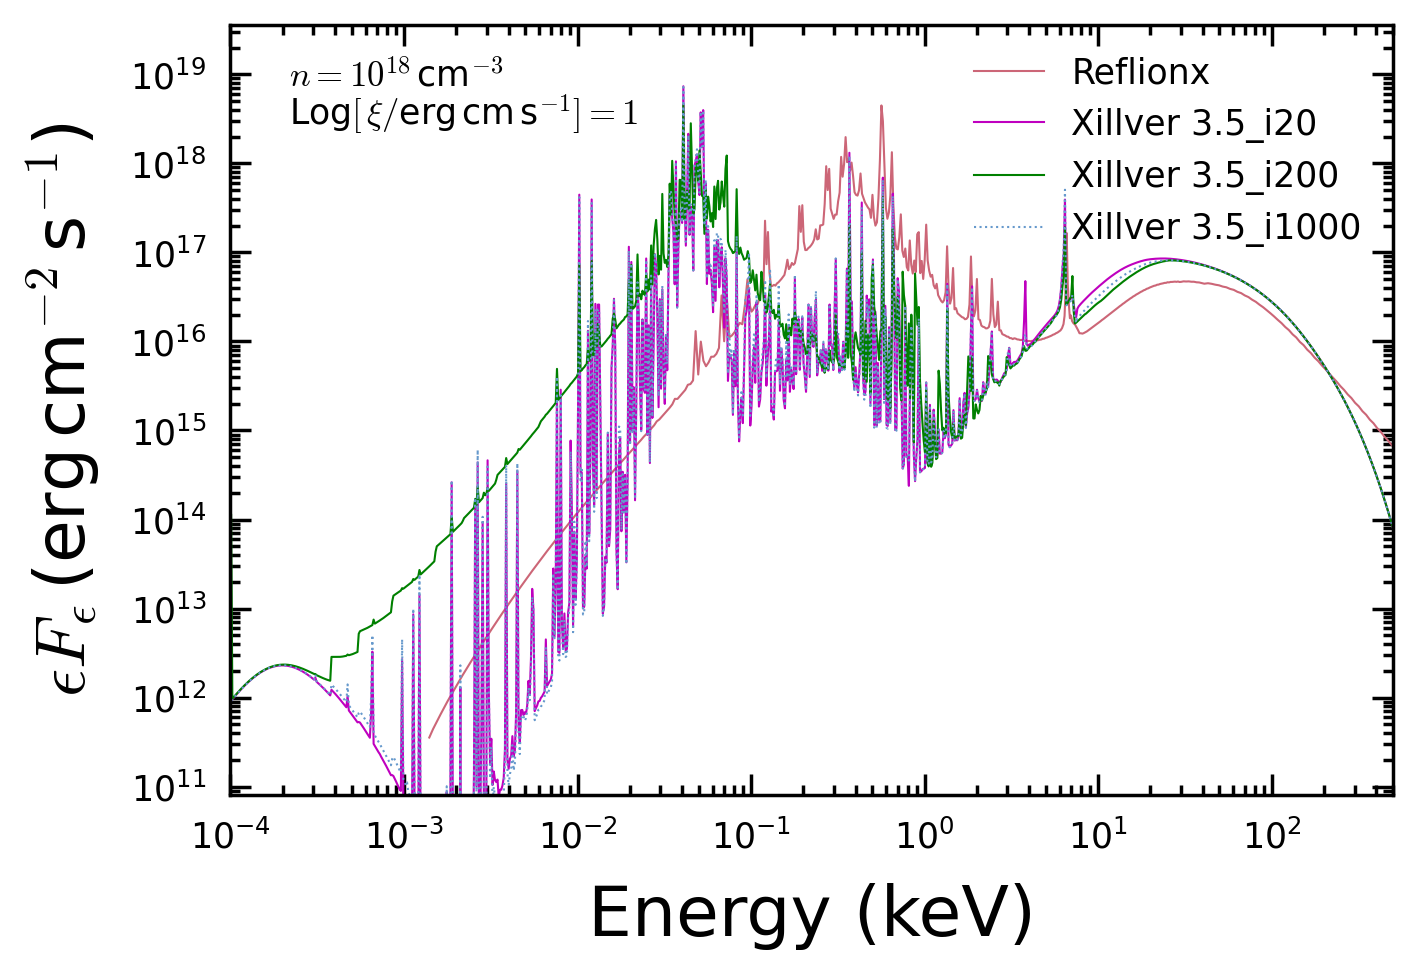

In [207]:
#Ploting spectra for publication
import scienceplots
import matplotlib.pyplot as plt
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":5,
"legend.fancybox":True})

lw=0.3
numrow=1
numcol=1
colorlst=["#CC6677","#88CCEE","#6699CC"]
fig=plt.figure(figsize=(3*numcol,2*numrow),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
#nthfac=1e29
"""
diff1=np.abs(rx-20)
diff2=np.abs(specE2/1e3-20)
ind1=np.argmin(diff1)
ind2=np.argmin(diff2)
fac=foutE2[ind2]*eV*specE2[ind2]/rxmo[ind1]

diff1=np.abs(rx-20)
diff2=np.abs(new_specE/1e3-20)
ind1=np.argmin(diff1)
ind2=np.argmin(diff2)
fac=new_fout[ind2]*eV*new_specE[ind2]/rxmo[ind1]
"""
#fac=1e20
#Setting negative fluxes to zero
find=foutE2<0
foutE2[find]=0.
#rxfac=1.5e20

#axs.plot(rx,fac*rxmo*rx*1e3*eV,color=colorlst[0],label="Reflionx",lw=lw)
#axs.plot(rx,fac*rxmo*rx*1e3*eV,color=colorlst[0],label="Reflionx",lw=lw)
#axs.plot(nthx,nthfac*nthmo*nthx*1e3*eV,color="green",label="nthcomp",lw=lw)
#axs.plot(rx,fac*rxmo*rx*1e3*eV,color=colorlst[0],label="Reflionx",lw=lw)
axs.plot(rxinput2[0],rxfac*rxinput2[2]*eV*1e3,ls="-",color=colorlst[0],label="Reflionx",lw=lw)

#axs.plot(rxinput2[0],rxfac*rxinput2[1]*eV*1e3,"r-.")

#axs.plot(rxinput[0],1e1*rxfac*rxinput[2]*eV*1e3,"r-.")

#axs.step(specE1/1e3,facx*0.01*foutE1*eV*specE3,color="g",label="Xillver 3.5_i200",lw=lw)
#axs.plot(specE1/1e3,facx*0.01*fionizE1*eV*specE3,color="g",lw=lw)


#axs.plot(specE3/1e3,facx*0.01*foutE3*eV*specE3,color="m",label="Xillver 3.5_i20",lw=lw)
#axs.plot(specE3/1e3,facx*0.01*fionizE3*eV*specE3,color="m",lw=lw)


#axs.plot(specE1/1e3,fionizE1*eV*specE1,"c-.",ms=0.5)

#axs.plot(energy[0],flux[0]*energy[0]*1e3*eV,color=colorlst[1],ms=0.5,label="per channel",lw=lw)


#axs.plot(specE2/1e3,facx*foutE2*eV*specE2,color=colorlst[2],ms=0.5,label="Xillver 3.5",lw=lw)

#axs.plot(specE2/1e3,facx*fionizE2*eV*specE2,color=colorlst[2],ms=0.5,lw=lw)

#axs.step(specE2/1e3,facx*0.01*eV*foutE2*specE2,color=colorlst[2],ls=":",ms=0.5,label="Xillver 3.5_i1000",lw=lw)


axs.plot(new_specE3/1e3,new_fout3*eV*new_specE3*facx,color="m",ms=0.5,label="Xillver 3.5_i20",lw=lw)

axs.plot(new_specE1/1e3,new_fout1*eV*new_specE1*facx,color="g",ms=0.5,label="Xillver 3.5_i200",lw=lw)



axs.plot(new_specE2/1e3,new_fout2*eV*new_specE2*facx,color=colorlst[2],ms=0.5,ls=":",label="Xillver 3.5_i1000",lw=lw)


#axs.plot(new_specE/1e3,new_fout*facx,color=colorlst[2],ms=0.5,label="Xillver 3.5",lw=lw)
#yup=np.max(new_fout*eV*new_specE*facx)
yup=np.max(new_fout2*eV*new_specE2*facx)
ylow=np.min(fac*rxmo[500:900]*rx[500:900]*1e3*eV)
#axs.plot(specE2/1e3,fionizE2*eV*specE2,"b-.",ms=0.5)
#axs.plot(specE3/1e3,foutE3*eV*specE3,"C2",ms=0.5,label="Xillver 3.5(ATDB2021)",lw=lw)

#pfac=8e22
#plt.plot(xvals,pfac*np.array(yvals),"g",label="pexrav")
#plt.plot(xorgvals,pfac*np.array(yorgvals),"g--")


axs.set_xscale("log")
axs.legend(loc='upper right')
axs.set_yscale("log")
axs.set_xlabel("Energy (keV)",fontsize=10)
axs.set_ylabel(r"$\epsilon F_{\epsilon}\,$(erg$\,$cm$^{-2}\,$s$^{-1}$)",fontsize=10)
axs.set_xlim([1e-4,5e2])
axs.set_ylim([ylow/1e4,yup*5])
#plt.axvline(x=)
#axs=plt.gca()
axs.text(0.05,0.92,r"$n=10^{%s}\,$cm$^{-3}$"%density,transform=axs.transAxes)
axs.text(0.05,0.87,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%s $"%logxi,transform=axs.transAxes)


# change resolution: put new figures in the paper'

## text: we don't understand the difference with Reflionx yet, but have checked 1. ... 2. ...
#plt.savefig("./pub3/compRX"+datype+".pdf",dpi=300)

0.0032766470989412403 9.719145454038934e-07
integrating in energy range (keV): 0.000200125352 0.049988168081
fraction of flux in this range: 0.0003277619013486645
0.07800047100924647 -9.446127578079651e-07
integrating in energy range (keV): 0.049988168081 0.29999360866299996
fraction of flux in this range: 0.0077999526396488675
7.966771896385358 -0.01016273284082194
integrating in energy range (keV): 0.29999360866299996 2.997039415483
fraction of flux in this range: 0.7956609163544537
0.20877890778870978 0.010380323907455002
integrating in energy range (keV): 2.997039415483 9.984589953237
fraction of flux in this range: 0.02191592316961648
1.5905081426222725 0.012035265380942054
integrating in energy range (keV): 9.984589953237 100.078009399104
fraction of flux in this range: 0.1602543408003215
0.1374089237930171 0.0005352248306743238
integrating in energy range (keV): 100.078009399104 999.999999999615
fraction of flux in this range: 0.013794414862369146


Text(0.0002, 2000000000000000.0, 'Percentage of ReflionX output flux')

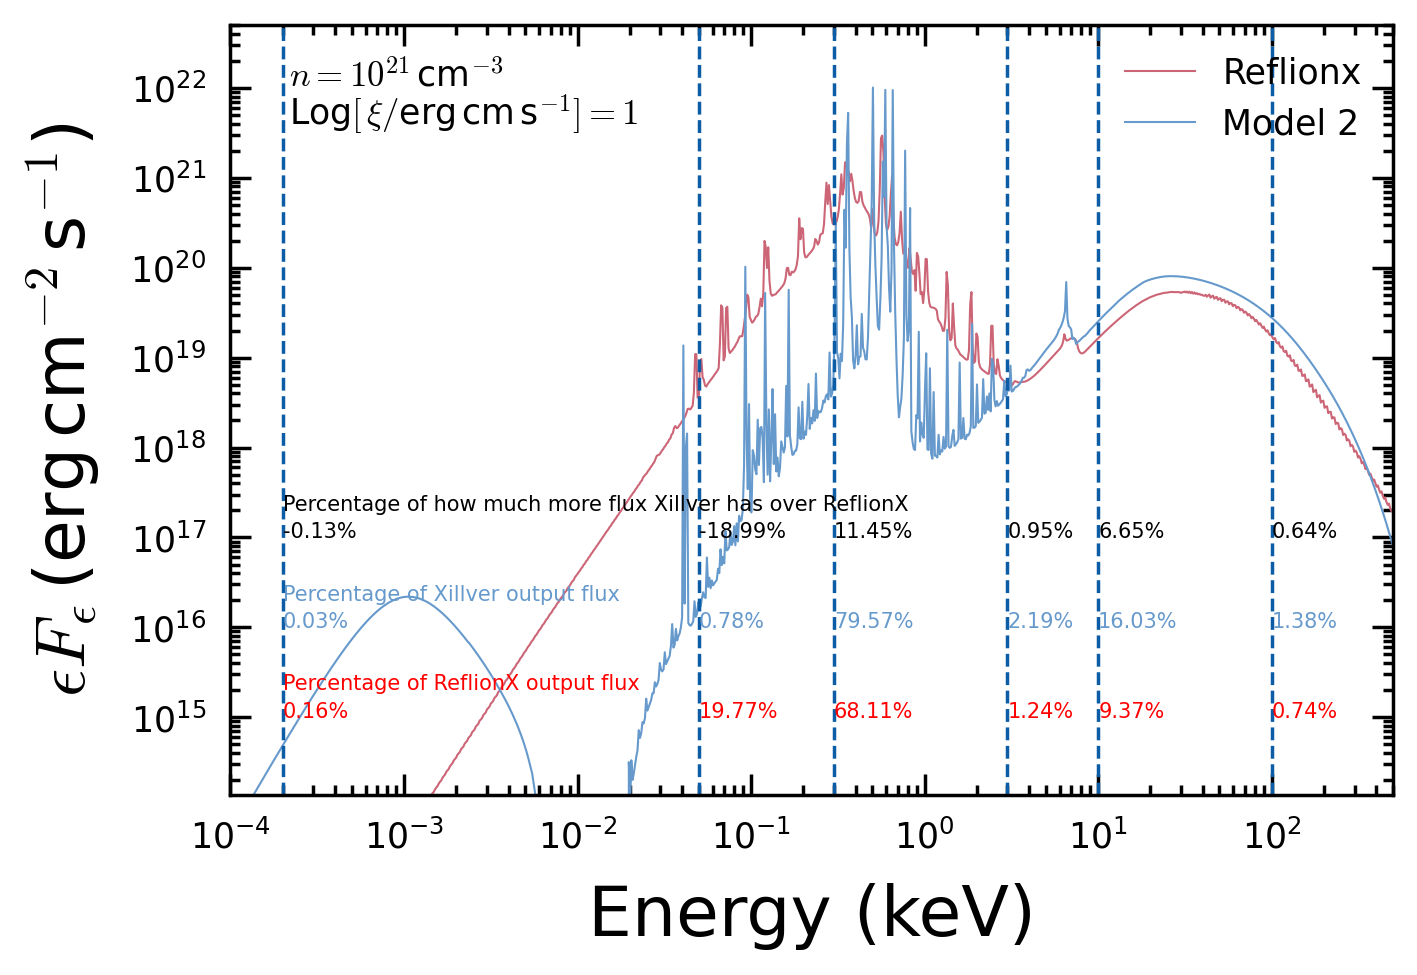

In [186]:
#Ploting spectra for publication
import scienceplots
import matplotlib.pyplot as plt
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":5,
"legend.fancybox":True})

lw=0.3
numrow=1
numcol=1
colorlst=["#CC6677","#88CCEE","#6699CC"]
fig=plt.figure(figsize=(3*numcol,2*numrow),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
#nthfac=1e29
"""
diff1=np.abs(rx-20)
diff2=np.abs(specE2/1e3-20)
ind1=np.argmin(diff1)
ind2=np.argmin(diff2)
fac=foutE2[ind2]*eV*specE2[ind2]/rxmo[ind1]

diff1=np.abs(rx-20)
diff2=np.abs(new_specE/1e3-20)
ind1=np.argmin(diff1)
ind2=np.argmin(diff2)
fac=new_fout[ind2]*eV*new_specE[ind2]/rxmo[ind1]
"""
#fac=1e20
#Setting negative fluxes to zero
find=foutE2<0
foutE2[find]=0.
#rxfac=1.5e20

axs.plot(rx,fac*rxmo*rx*1e3*eV,color=colorlst[0],label="Reflionx",lw=lw)
#axs.plot(rx,fac*rxmo,color=colorlst[0],label="Reflionx",lw=lw)
#axs.plot(nthx,nthfac*nthmo*nthx*1e3*eV,color="green",label="nthcomp",lw=lw)

#axs.plot(rxinput2[0],rxfac*rxinput2[2]*eV*1e3,"r-")

#axs.plot(rxinput2[0],rxfac*rxinput2[1]*eV*1e3,"r-.")

#axs.plot(rxinput[0],1e1*rxfac*rxinput[2]*eV*1e3,"r-.")

#axs.step(specE1/1e3,facx*0.01*foutE1*eV*specE3,color="g",label="Xillver 3.5_i20",lw=lw)
#axs.plot(specE1/1e3,facx*0.01*fionizE1*eV*specE3,color="g",lw=lw)


#axs.plot(specE3/1e3,facx*0.01*foutE3*eV*specE3,color="m",label="Xillver 3.5_i200",lw=lw)
#axs.plot(specE3/1e3,facx*0.01*fionizE3*eV*specE3,color="m",lw=lw)


#axs.plot(specE1/1e3,fionizE1*eV*specE1,"c-.",ms=0.5)

#axs.plot(energy[0],flux[0]*energy[0]*1e3*eV,color=colorlst[1],ms=0.5,label="per channel",lw=lw)


#axs.plot(specE2/1e3,facx*foutE2*eV*specE2,color=colorlst[2],ms=0.5,label="Xillver 3.5",lw=lw)

#axs.plot(specE2/1e3,facx*fionizE2*eV*specE2,color=colorlst[2],ms=0.5,lw=lw)

#axs.step(specE2/1e3,facx*0.01*eV*foutE2*specE2,color=colorlst[2],ls=":",ms=0.5,label="Xillver 3.5_i1000",lw=lw)
#axs.step(specE2/1e3,foutE2,color=colorlst[2],ls=":",ms=0.5,label="Xillver 3.5_i1000",lw=lw)

axs.plot(new_specE2/1e3,new_specE2*eV*new_fout2*facx,color=colorlst[2],ms=0.5,label="Model 2",lw=lw)
#axs.step(new_specE2/1e3,facx*eV*new_fout2*new_specE2,color=colorlst[2],ls=":",ms=0.5,label="Xillver 3.5_i1000",lw=lw)
#axs.step(new_specE2/1e3,facx*new_fout2,color=colorlst[2],ls=":",ms=0.5,label="Xillver 3.5_i1000",lw=lw)
#axs.plot(new_specE/1e3,new_fout*facx,color=colorlst[2],ms=0.5,label="Xillver 3.5",lw=lw)
#yup=np.max(new_fout*eV*new_specE*facx)
yup=np.max(new_fout2*eV*new_specE2*facx)
#yup=np.max(facx*eV*new_fout2*new_specE2)
ylow=np.min(fac*rxmo[500:900]*rx[500:900]*1e3*eV)
#ylow=np.min(fac*rxmo[500:900])

#axs.plot(specE2/1e3,fionizE2*eV*specE2,"b-.",ms=0.5)
#axs.plot(specE3/1e3,foutE3*eV*specE3,"C2",ms=0.5,label="Xillver 3.5(ATDB2021)",lw=lw)

#pfac=8e22
#plt.plot(xvals,pfac*np.array(yvals),"g",label="pexrav")
#plt.plot(xorgvals,pfac*np.array(yorgvals),"g--")


axs.set_xscale("log")
axs.legend(loc='upper right')
axs.set_yscale("log")
axs.set_xlabel("Energy (keV)",fontsize=10)
axs.set_ylabel(r"$\epsilon F_{\epsilon}\,$(erg$\,$cm$^{-2}\,$s$^{-1}$)",fontsize=10)
axs.set_xlim([1e-4,500])
#axs.set_xlim([0.1,2])
axs.set_ylim([ylow/1e4,yup*5])
#axs.set_ylim([1e24,1e33])
#plt.axvline(x=)
#axs=plt.gca()
axs.text(0.05,0.92,r"$n=10^{%s}\,$cm$^{-3}$"%density,transform=axs.transAxes)
axs.text(0.05,0.87,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%s $"%logxi,transform=axs.transAxes)


##=================================testing energy conservation======================================##

edges=[2e-4,0.05,0.3,3,10,100,1000]
fx=foutE2
fd=foutdE2
x=specE2
fin=fionizE2
Lin=np.trapz(fin,x=x*eV)
Loutall=np.trapz((fx+fd),x=x*eV)
LoutrefXall=fac*np.trapz(rxmo*1e3*eV,x=rx)
afac=LoutrefXall/Loutall
for ind,es in enumerate(edges[:-1]):
    elow = es #keV
    eup =  edges[ind+1] #keV

    cut1=np.argmin(np.abs(x/1e3-elow))
    cut2=np.argmin(np.abs(x/1e3-eup))
    
    axs.axvline(elow,lw=0.5,ls="--")
    
    cutrx1=np.argmin(np.abs(rx-elow))
    cutrx2=np.argmin(np.abs(rx-eup))
    
    Lout=afac*np.trapz(fx[cut1:cut2],x=x[cut1:cut2]*eV)
    Loutd=afac*np.trapz(fd[cut1:cut2],x=x[cut1:cut2]*eV)
    LoutrefX=np.trapz(fac*rxmo[cutrx1:cutrx2]*1e3*eV,rx[cutrx1:cutrx2])
    
    print(Lout*4*np.pi/10**(density)/1.2,Loutd*4*np.pi/10**(density)/1.2)#,Lin*4*np.pi/10**(density)/1.2,)
    #print((Loutd+Lout-Lin)/Lin)
    print("integrating in energy range (keV):",x[cut1]/1000,x[cut2]/1000)
    ffrac=(Lout+Loutd)/Loutall/afac
    ffracref=LoutrefX*4*np.pi/10**(density)/1.2/10**logxi
    fdef=(Lout+Loutd-LoutrefX)/Loutall/afac
    print("fraction of flux in this range:",ffrac)
    
    axs.text(elow,1e17,f"{fdef*100:.2f}%",horizontalalignment="left",fontsize=3)
    
    axs.text(elow,1e16,f"{ffrac*100:.2f}%",horizontalalignment="left",color=colorlst[2],fontsize=3)
    
    axs.text(elow,1e15,f"{ffracref*100:.2f}%",horizontalalignment="left",color="red",fontsize=3)
# change resolution: put new figures in the paper'
axs.text(edges[0],2e17,"Percentage of how much more flux Xillver has over ReflionX",horizontalalignment="left",fontsize=3)
axs.text(edges[0],2e16,f"Percentage of Xillver output flux",horizontalalignment="left",color=colorlst[2],fontsize=3)
axs.text(edges[0],2e15,f"Percentage of ReflionX output flux",horizontalalignment="left",color="red",fontsize=3)

## text: we don't understand the difference with Reflionx yet, but have checked 1. ... 2. ...
#plt.savefig("./pub3/compRX"+datype+".pdf",dpi=300)

In [181]:
LoutrefXall

9.54929658551372e+20

In [182]:
np.trapz(rxmo[cutrx1:cutrx2]*1e3*eV,rx[cutrx1:cutrx2])


4.5690913462957154e-12

In [154]:
Lin

9.949405798721145e+20

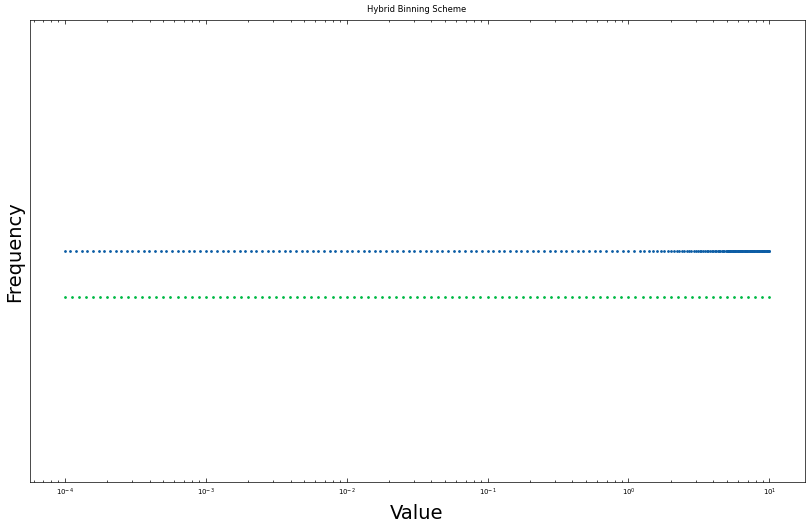

array([1.00000000e-04, 1.09647820e-04, 1.20226443e-04, 1.31825674e-04,
       1.44543977e-04, 1.58489319e-04, 1.73780083e-04, 1.90546072e-04,
       2.08929613e-04, 2.29086765e-04, 2.51188643e-04, 2.75422870e-04,
       3.01995172e-04, 3.31131121e-04, 3.63078055e-04, 3.98107171e-04,
       4.36515832e-04, 4.78630092e-04, 5.24807460e-04, 5.75439937e-04,
       6.30957344e-04, 6.91830971e-04, 7.58577575e-04, 8.31763771e-04,
       9.12010839e-04, 1.00000000e-03, 1.09647820e-03, 1.20226443e-03,
       1.31825674e-03, 1.44543977e-03, 1.58489319e-03, 1.73780083e-03,
       1.90546072e-03, 2.08929613e-03, 2.29086765e-03, 2.51188643e-03,
       2.75422870e-03, 3.01995172e-03, 3.31131121e-03, 3.63078055e-03,
       3.98107171e-03, 4.36515832e-03, 4.78630092e-03, 5.24807460e-03,
       5.75439937e-03, 6.30957344e-03, 6.91830971e-03, 7.58577575e-03,
       8.31763771e-03, 9.12010839e-03, 1.00000000e-02, 1.09647820e-02,
       1.20226443e-02, 1.31825674e-02, 1.44543977e-02, 1.58489319e-02,
      

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# Total number of bins
total_bins = 200

# Define the ranges
low_range = 1e-4
mid_range_start = 1
mid_range_end = 5
high_range = 10

# Allocate bins
bins_in_mid_range = int(total_bins * 0.2)  # 50% of bins in the range of 1 to 10
bins_in_low_range = int(total_bins * 0.5)  # 25% of bins for low range
bins_in_high_range = total_bins - bins_in_mid_range - bins_in_low_range  # Rest for high range

# Generate bin edges
low_bin_edges = np.logspace(np.log10(low_range), np.log10(mid_range_start), bins_in_low_range + 1)
mid_bin_edges = np.linspace(mid_range_start, mid_range_end, bins_in_mid_range + 1)
high_bin_edges = np.logspace(np.log10(mid_range_end), np.log10(high_range), bins_in_high_range + 1)

log_bin_edges = np.logspace(np.log10(low_range), np.log10(high_range), 101)


# Combine bin edges
# Remove duplicate bin edge at the junctions
combined_bin_edges = np.concatenate((low_bin_edges[:-1], mid_bin_edges[:-1], high_bin_edges))

# Plot to visualize the bins
plt.figure(figsize=(10, 6))

plt.plot(combined_bin_edges, np.ones_like(combined_bin_edges), 'o', markersize=1)
plt.xscale('log')
plt.ylim(0.9, 1.1)
plt.xlabel('Value')
plt.title('Hybrid Binning Scheme')
plt.yticks([])

plt.plot(log_bin_edges, np.ones_like(log_bin_edges)*0.98, 'o', markersize=1)

plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Hybrid Binning Scheme')
plt.show()

combined_bin_edges

/tmp/ipykernel_550746/1672722380.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('hsv')


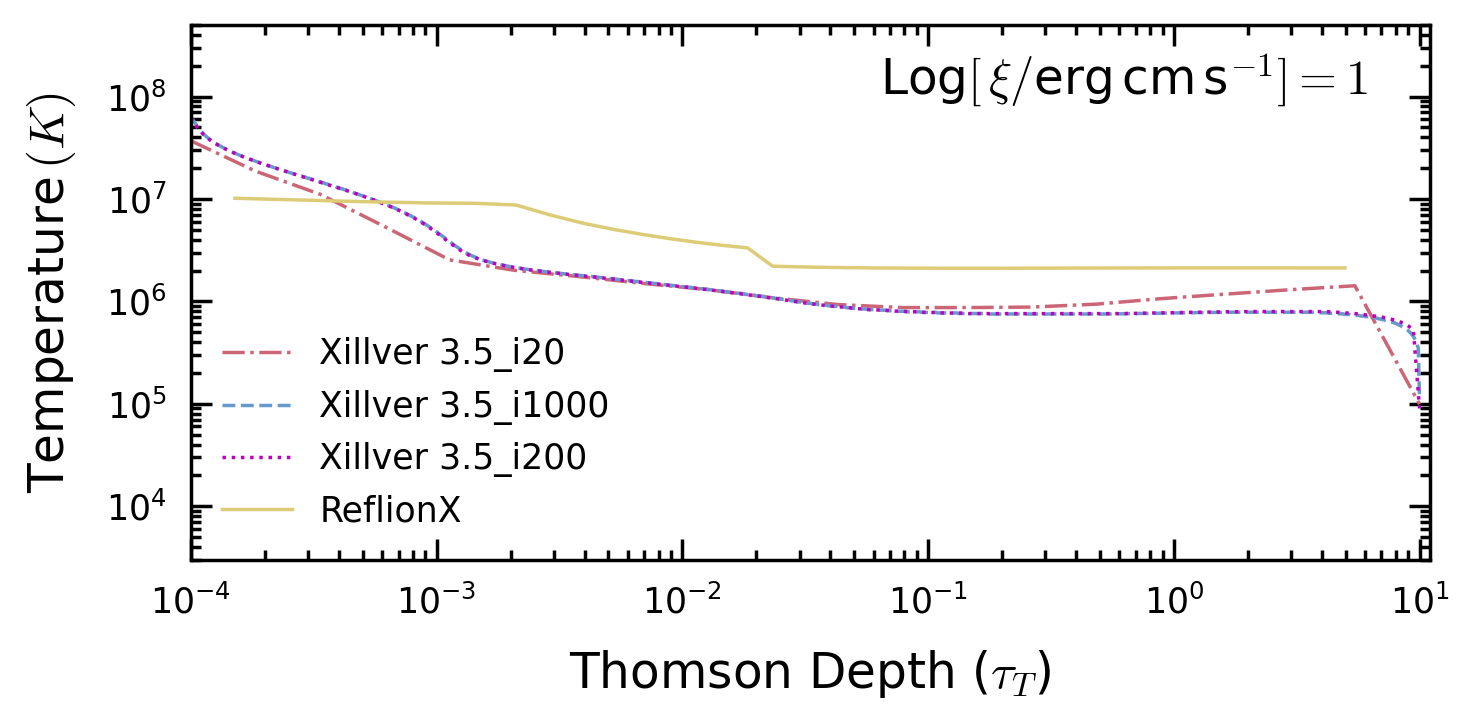

In [145]:
#Comparing different iterations
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from os.path import join
import scienceplots
from matplotlib.lines import Line2D
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":5,
"legend.fancybox":True})
colors=["#CC6677","#DDCC77","#6699CC"]

eV=1.602e-12
kb=1.3807e-16


numrow=1
numcol=1
lw=0.5
cmap = matplotlib.cm.get_cmap('hsv')
sm = plt.cm.ScalarMappable(cmap=cmap)
#colors=matplotlib.cm.hsv(np.arange(len(darray))/len(darray))

fig=plt.figure(figsize=(3*numcol,1.5*numrow),dpi=500)
gs = fig.add_gridspec(numrow,numcol,hspace=0)
axs=gs.subplots(sharex=True)
lines=[]

axs.plot(depth1,temp1,color=colors[0],lw=lw,ms=0.1,ls="-.",label="Xillver 3.5_i20")
axs.plot(depth2,temp2,color=colors[2],lw=lw,ls='--',label="Xillver 3.5_i1000")
axs.plot(depth3,temp3,color="m",lw=lw,ls=':',label="Xillver 3.5_i200")
line,=axs.plot(rxtemp2[1],rxtemp2[2],color=colors[1],lw=lw,ls='-',label="ReflionX")

#labels=[axdict1[density].get_label() for density in darray]
#labels[0]=r"Xillver$\,$3.4b$\,$"+labels[0]

#axs.legend([axdict1[density] for density in darray],ncols=4,labels=labels\
#              ,loc='best')
axs.legend(loc="lower left")
#axs[0].legend(fontsize=2)
#axs[1].legend(fontsize=2)
#axs[0].set_title("Spectrum")
#axs[1].set_title("Temperature profile")
axs.text(0.95,0.95,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs.transAxes,\
         verticalalignment='top',horizontalalignment='right',fontsize=7)
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_xlim([1e-4,11])
axs.set_xlabel(r"Thomson Depth ($\tau_{T}$)",fontsize=7)
axs.set_ylabel("Temperature$\,(K)$",fontsize=7)

#axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#axs[0].set_xlim([1e-4,10])
axs.set_ylim([3e3,5e8])
#axs[0].set_xlabel(r"$\tau_{T}$")
#axs[0].set_ylabel("Temperature$\,(K)$")
fig.tight_layout()
#fig.savefig("./pub2/temp_profile_logxi_{}.pdf".format(logxi))

In [480]:
#Let's get the ion fractions: reading ion fractions now
import bisect
import matplotlib.pyplot as plt


feselected=[ 'Fe_%d'%n for n in range(1,26)]
oselected=['O_%d'%n for n in range(1,8)]
elements=['H','He','Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn']
plelements=['H','He','C','O','Fe']
noa=[n*(n+1)/2 for n in range(1,31)]
linetab=[]

spect=[]
specto=[]
linedic={}
linedico={}
for layer in range(1,201):

    fractiono=fraction1[layer-1]
    fraction=fraction2[layer-1]
    for ind in range(len(fraction)):
        k=bisect.bisect_left(noa,ind+1)
        #print("k",k)
        #print("ind",ind)
        #print(noa[k])
        #print(k)
        if k == 0:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1))
            #print(linetab[-1])
            linedic[elements[k]+"_%d"%(ind+1)]=fraction[ind]
            linedico[elements[k]+"_%d"%(ind+1)]=fractiono[ind]
        else:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1-noa[k-1]))
            linedic[elements[k]+"_%d"%(ind+1-noa[k-1])]=fraction[ind]
            linedico[elements[k]+"_%d"%(ind+1-noa[k-1])]=fractiono[ind]
    spect.append(linedic.copy())
    specto.append(linedico.copy())

#for eind,e in enumerate(feselected):
#    axs[0].plot(depth1[layer-1],linedic[e],color="C%d"%eind)
#    axs[1].plot(depth2[layer-1],linedico[e],color="C%d"%eind)

#axs[0].set_yscale('log')
#axs[1].set_yscale('log')
#axs[1].set_xscale('log')
#axs[1].set_xlabel(r"$\epsilon F_{\epsilon}$")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])


/tmp/ipykernel_883090/3670512361.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('cividis')


Text(0, 0.5, 'Ion fractions')

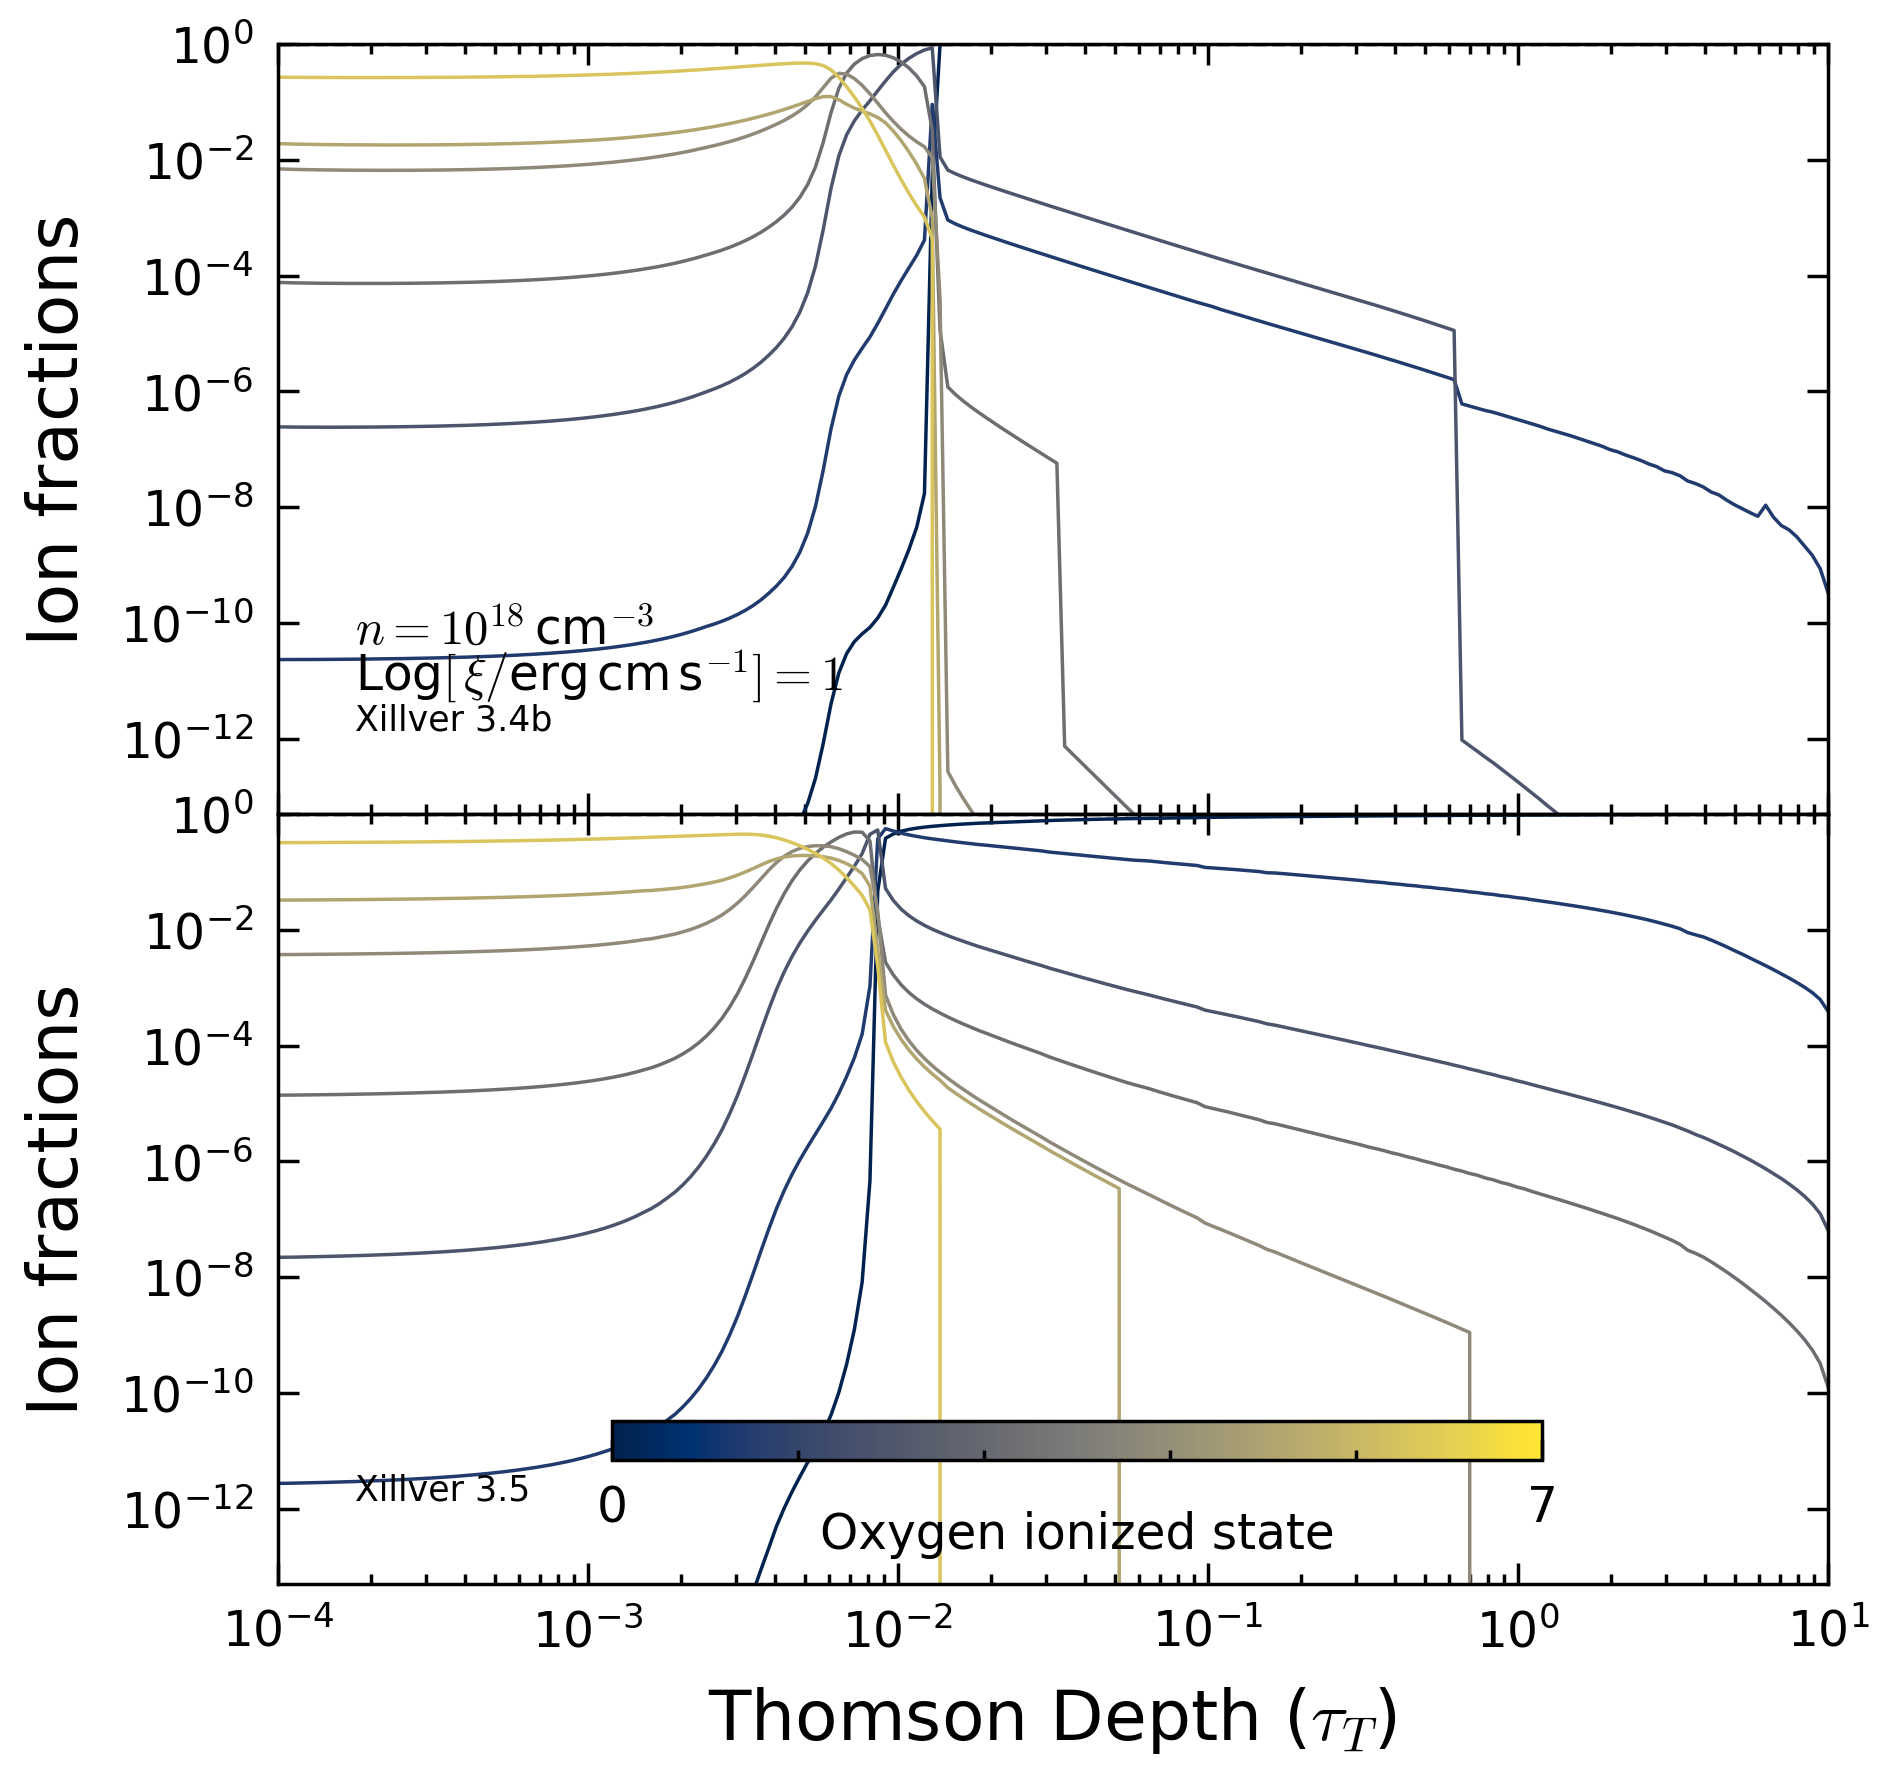

In [398]:
#Plotting Oxygen and Iron ion fractions
numrow=2
numcol=1
import scienceplots
import matplotlib
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axdict1={}
axdict2={}
lw=0.5
cmap = matplotlib.cm.get_cmap('cividis')
sm = plt.cm.ScalarMappable(cmap=cmap)
element="Oxygen"
#element="Iron"
ionselect=oselected
#ionselect=feselected
nion=len(ionselect)
gion=[]

colors=matplotlib.cm.cividis(np.arange(nion)/nion)

for eind,e in enumerate(ionselect):
        
    y1=np.array([data[e] for data in specto])
    y2=np.array([data[e] for data in spect])

    axdict1[e]=axs[0].plot(depth1,y1,color=colors[eind],lw=lw)
    gion.append(e)

    axdict2[e]=axs[1].plot(depth2,y2,color=colors[eind],lw=lw)

axins1 = inset_axes(axs[1],
                    width="60%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower left',
                    bbox_to_anchor=(0.2,0.13,1,1),
                    bbox_transform=axs[1].transAxes)
cbar=plt.colorbar(sm, ticks=np.linspace(0,1,2),orientation="horizontal",cax=axins1)
cbar.set_label(label=r"{} ionized state".format(element), labelpad=-3,fontsize=7)
cbar.ax.set_xticklabels(['0','%d'%nion])
axs[0].axhline(y=1,ls="--",lw=0.5,color='k')
axs[1].axhline(y=1,ls="--",lw=0.5,color='k')
axs[0].text(0.05,0.22,r"$n=10^{%d}\,$cm$^{-3}$"%density,transform=axs[0].transAxes)
axs[0].text(0.05,0.16,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs[0].transAxes)
axs[0].text(0.05, 0.1,"Xillver 3.4b",transform=axs[0].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[1].text(0.05, 0.1,"Xillver 3.5",transform=axs[1].transAxes,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[0].set_ylim([5e-14,1])
axs[1].set_ylim([5e-14,1])
axs[0].set_xlim([1e-4,10])
axs[1].set_xlim([1e-4,10])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"Thomson Depth ($\tau_{T}$)",fontsize=10)
axs[0].set_ylabel("Ion fractions",fontsize=10)
axs[1].set_ylabel("Ion fractions",fontsize=10)


#fig.savefig("./pub2/{}state_n{}_logxi_{}.pdf".format(element,density,logxi))


In [102]:
#Reading heating and cooling rates
import bisect
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes




feselected=[ 'Fe_%d'%n for n in range(1,26)]

elements=['H','He','Li','Be','B','C','N','O','F','Ne','Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn']
plelements=['H','He','O','Fe']
noa=[n*(n+1)/2 for n in range(1,31)]
linetab=[]

heat=[]
heato=[]
heatosum=[]
cool=[]
coolo=[]
linedic={}
linedicosum={}
linedico={}
linec={}
lineco={}
for layer in range(1,201):

    heatingo=heating1[layer-1]
    heating=heating2[layer-1]
    coolingo=cooling1[layer-1]
    cooling=cooling2[layer-1]
    for ind in range(len(heating)):
        k=bisect.bisect_left(noa,ind+1)
        #print("k",k)
        #print("ind",ind)
        #print(noa[k])
        #print(k)
        if k == 0:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1))
            #print(linetab[-1])
            #linedic[elements[k]+"_%d"%(ind+1)]=heating[ind]
            linedico[elements[k]+"_%d"%(ind+1)]=heatingo[ind]
        else:
            if layer==1:
                linetab.append(elements[k]+"_%d"%(ind+1-noa[k-1]))
            #linedic[elements[k]+"_%d"%(ind+1-noa[k-1])]=heating[ind]
            linedico[elements[k]+"_%d"%(ind+1-noa[k-1])]=heatingo[ind]
        if elements[k] in linedicosum.keys():
            linedicosum[elements[k]]+=np.float64(heatingo[ind])
            lineco[elements[k]]+=np.float64(coolingo[ind])
        else:
            linedicosum[elements[k]]=np.float64(heatingo[ind])
            lineco[elements[k]]=np.float64(coolingo[ind])
        
    for ind in range(len(elements)):
        linedic[elements[ind]]=heating[ind]
        linec[elements[ind]]=cooling[ind]
    heat.append(linedic.copy())
    heato.append(linedico.copy())
    heatosum.append(linedicosum.copy())
    cool.append(linec.copy())
    coolo.append(lineco.copy())

#for eind,e in enumerate(feselected):
#    axs[0].plot(depth1[layer-1],linedic[e],color="C%d"%eind)
#    axs[1].plot(depth2[layer-1],linedico[e],color="C%d"%eind)

#axs[0].set_yscale('log')
#axs[1].set_yscale('log')
#axs[1].set_xscale('log')
#axs[1].set_xlabel(r"$\epsilon F_{\epsilon}$")
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

/tmp/ipykernel_3416473/979350961.py:101: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axs[1].legend([axdict2[e] for e in gion],ncols=3,labels=gion,fontsize=5,\


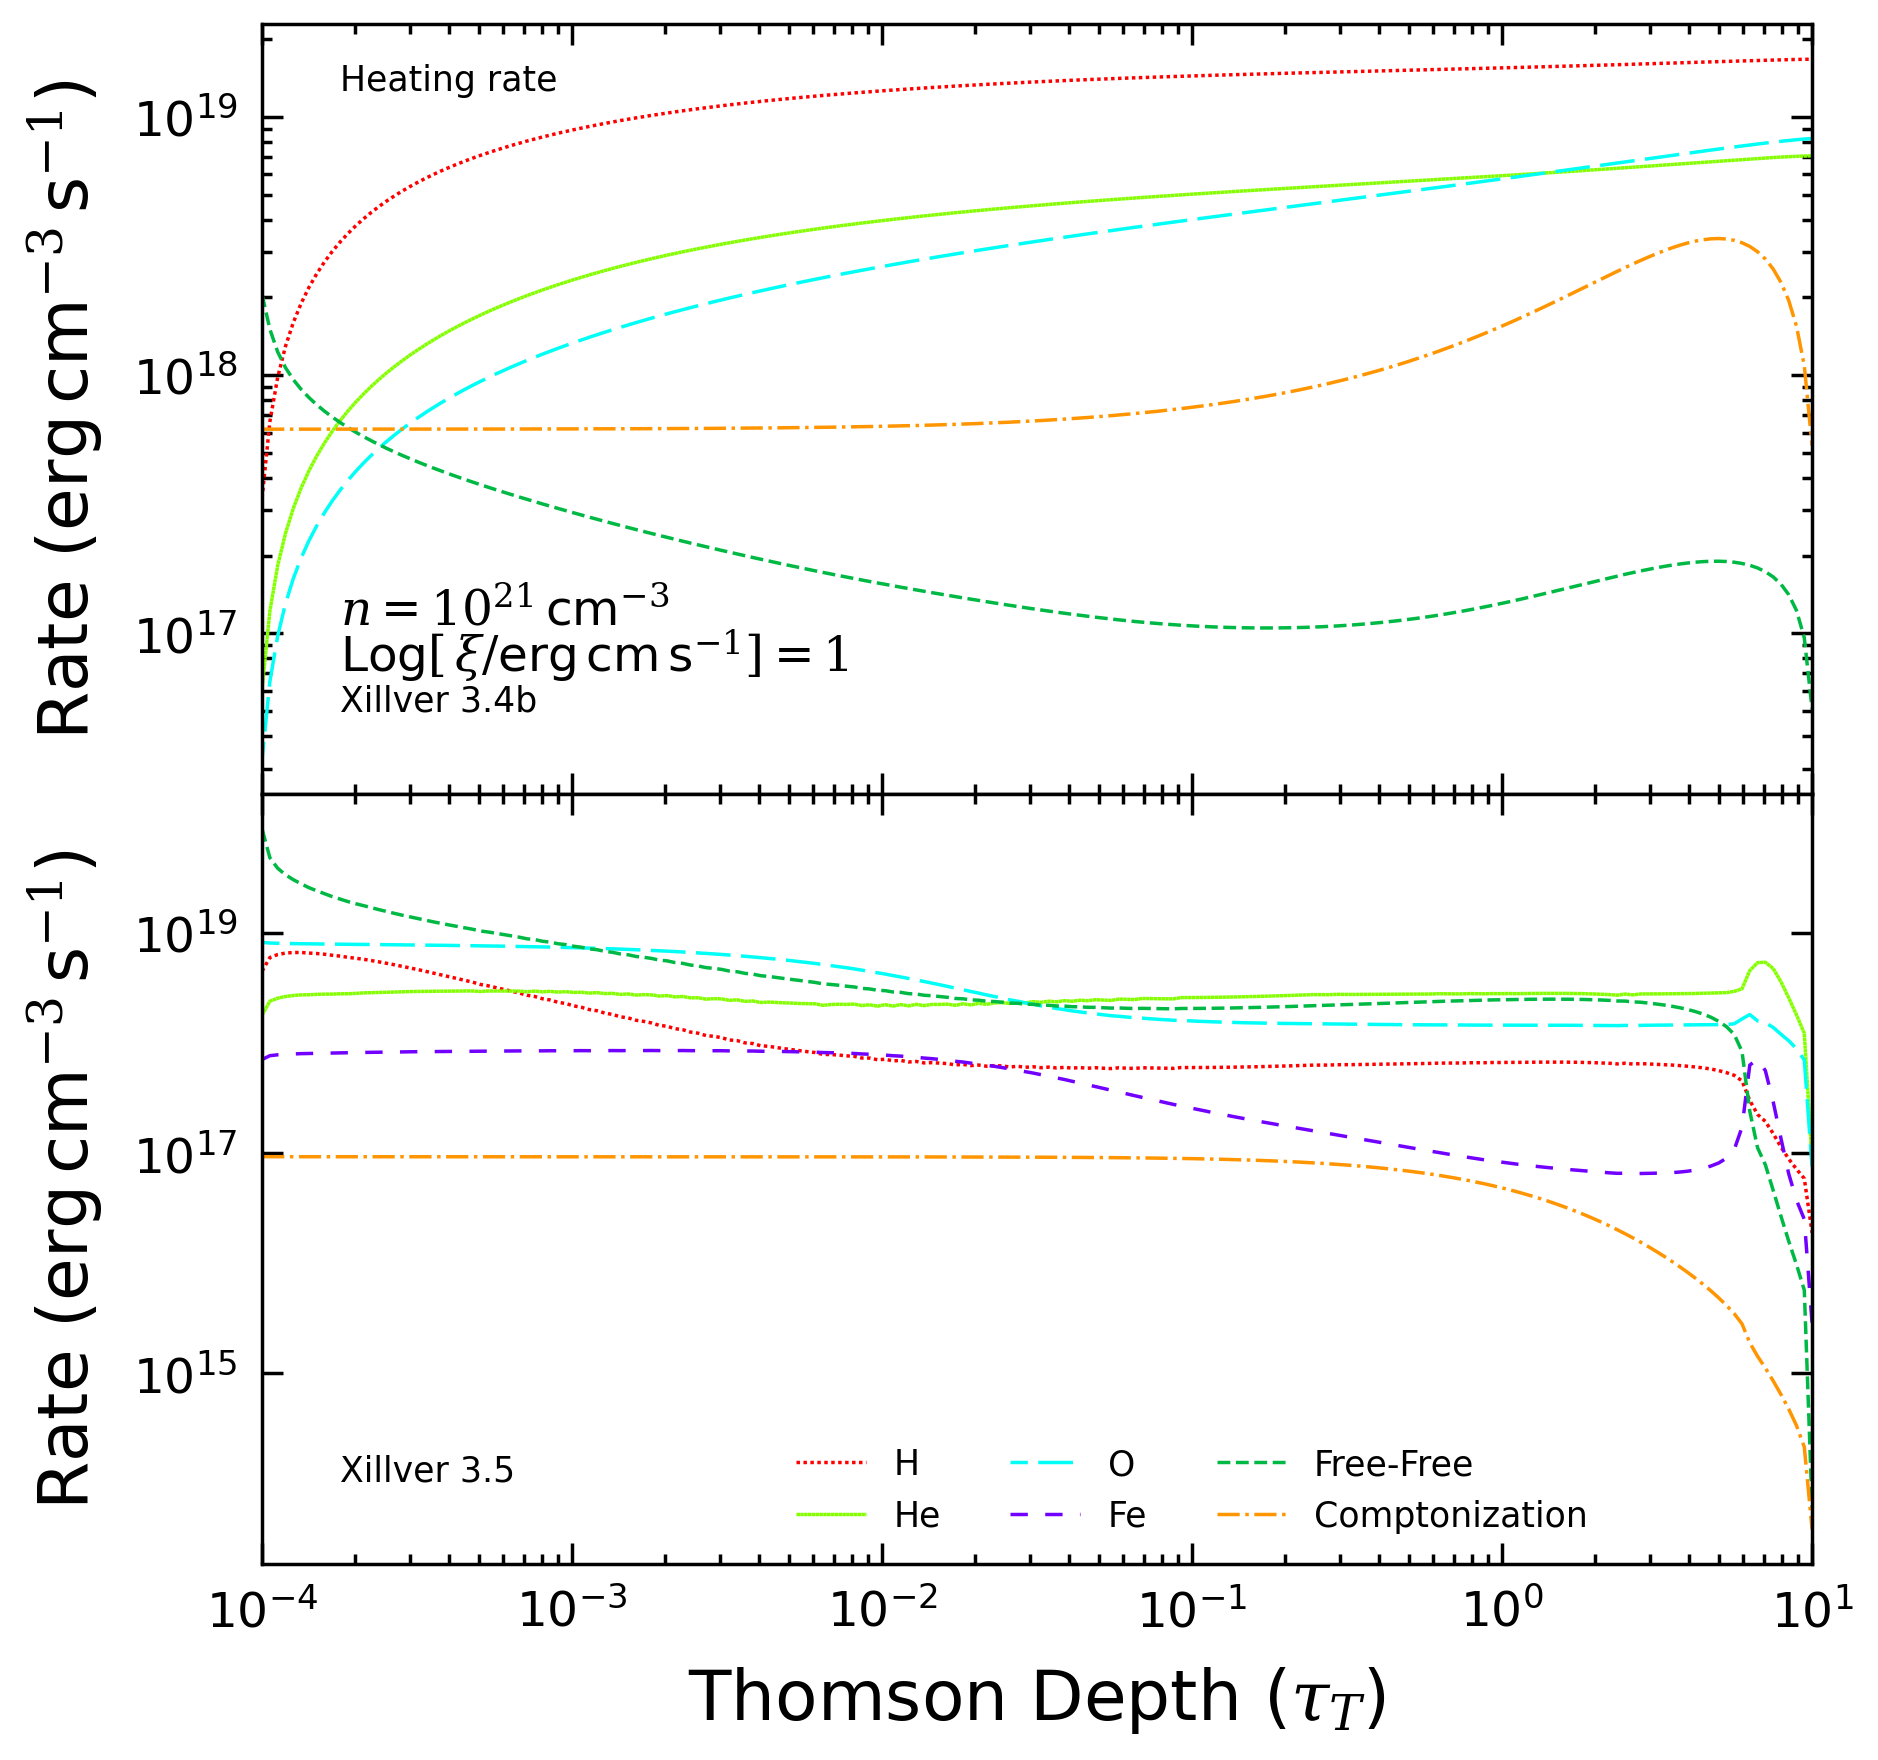

In [1378]:
##Comparing heating for publication
import scienceplots
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})

numrow=2
numcol=1

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axdict1={}
axdict2={}
lw=0.5

sm = plt.cm.ScalarMappable(cmap=cmap)
ionselect=plelements
nion=len(ionselect)
gion=[]
colors=matplotlib.cm.hsv(np.arange(nion)/nion)

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),
     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
ls=[(0, (1, 1)),(0, (1, 0.1)),(5, (10, 3)),(0, (5, 5)),(0, (5, 1)),(0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)),\
   (0, (3, 5, 1, 5, 1, 5)),(0, (3, 1, 1, 1, 1, 1)),(0, (5, 1)),(0, (5, 5))\
    ,(0, (3, 1, 1, 1, 1, 1)),(0, (1, 0.1)),(0, (5, 5))]

#ls=[lst[1] for lst in linestyle_tuple]
#,linestyle=ls[len(gion)]
for eind,e in enumerate(ionselect):
    #print(e)
    #print(spect[layer-1][e])
    
    y2=np.array([data[e] for data in heat])
    
    if np.any(y2>10):
        pnum=len(axdict2)
        axdict2[e]=axs[1].plot(depth2,y2,color=colors[eind],lw=lw,ls=ls[pnum])
        gion.append(e)
        
    if e != "Fe":
        y1=np.array([data[e] for data in heatosum])
        if np.any(y1>10):
            axdict1[e]=axs[0].plot(depth1,y1,color=colors[eind],lw=lw,ls=ls[pnum])

#Adding f-f and Comptonization etc.
mech='Free-Free'
axdict1[mech]=axs[0].plot(depth1,htfreef1,'--C1',lw=lw)
axdict2[mech]=axs[1].plot(depth2,htfreef2,'--C1',lw=lw)
gion.append(mech)
mech='Comptonization'
axdict1[mech]=axs[0].plot(depth1,htcomp1,'-.C2',lw=lw)
axdict2[mech]=axs[1].plot(depth2,htcomp2,'-.C2',lw=lw)
gion.append(mech)

#axs[0].plot(depth1,htlines1,'-.C2',lw=lw)
#axins1 = inset_axes(axs[1],
#                    width="60%",  # width = 50% of parent_bbox width
#                    height="5%",  # height : 5%
#                    loc='lower left',
#                    bbox_to_anchor=(0.2,0.13,1,1),
#                    bbox_transform=axs[1].transAxes)
#cbar=plt.colorbar(sm, ticks=np.linspace(0,1,2),orientation="horizontal",cax=axins1)
#cbar.set_label(label=r"Z", labelpad=-1)
#cbar.ax.set_xticklabels(['0','%d'%nion])
axs[0].text(0.05, 0.95,"Heating rate",transform=axs[0].transAxes\
            ,verticalalignment='top',horizontalalignment='left',fontsize=5)
axs[0].text(0.05,0.22,r"$n=10^{%d}\,$cm$^{-3}$"%density,transform=axs[0].transAxes)
axs[0].text(0.05,0.16,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs[0].transAxes)

axs[0].text(0.05, 0.1,"Xillver 3.4b",transform=axs[0].transAxes\
            ,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[1].text(0.05, 0.1,"Xillver 3.5",transform=axs[1].transAxes\
            ,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
#axs[0].set_ylim([1e-13,1])
#axs[1].set_ylim([1e-13,1])
axs[0].set_xlim([1e-4,10])
axs[1].set_xlim([1e-4,10])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"Thomson Depth ($\tau_{T}$)",fontsize=10)
axs[0].set_ylabel(r"Rate (erg$\,$cm$^{-3}\,$s$^{-1}$)",fontsize=10)
axs[1].set_ylabel(r"Rate (erg$\,$cm$^{-3}\,$s$^{-1}$)",fontsize=10)
axs[1].legend([axdict2[e] for e in gion],ncols=3,labels=gion,fontsize=5,\
              loc='lower center',bbox_to_anchor=(0.6,0))
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected)
fig.savefig("./pub2/heatingrates_{}.pdf".format(datype))
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

/tmp/ipykernel_3416473/4025006229.py:74: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  axs[1].legend([axdict1[e] for e in gion],labels=gion,fontsize=5,ncol=3,loc='lower center',bbox_to_anchor=(0.65,0))


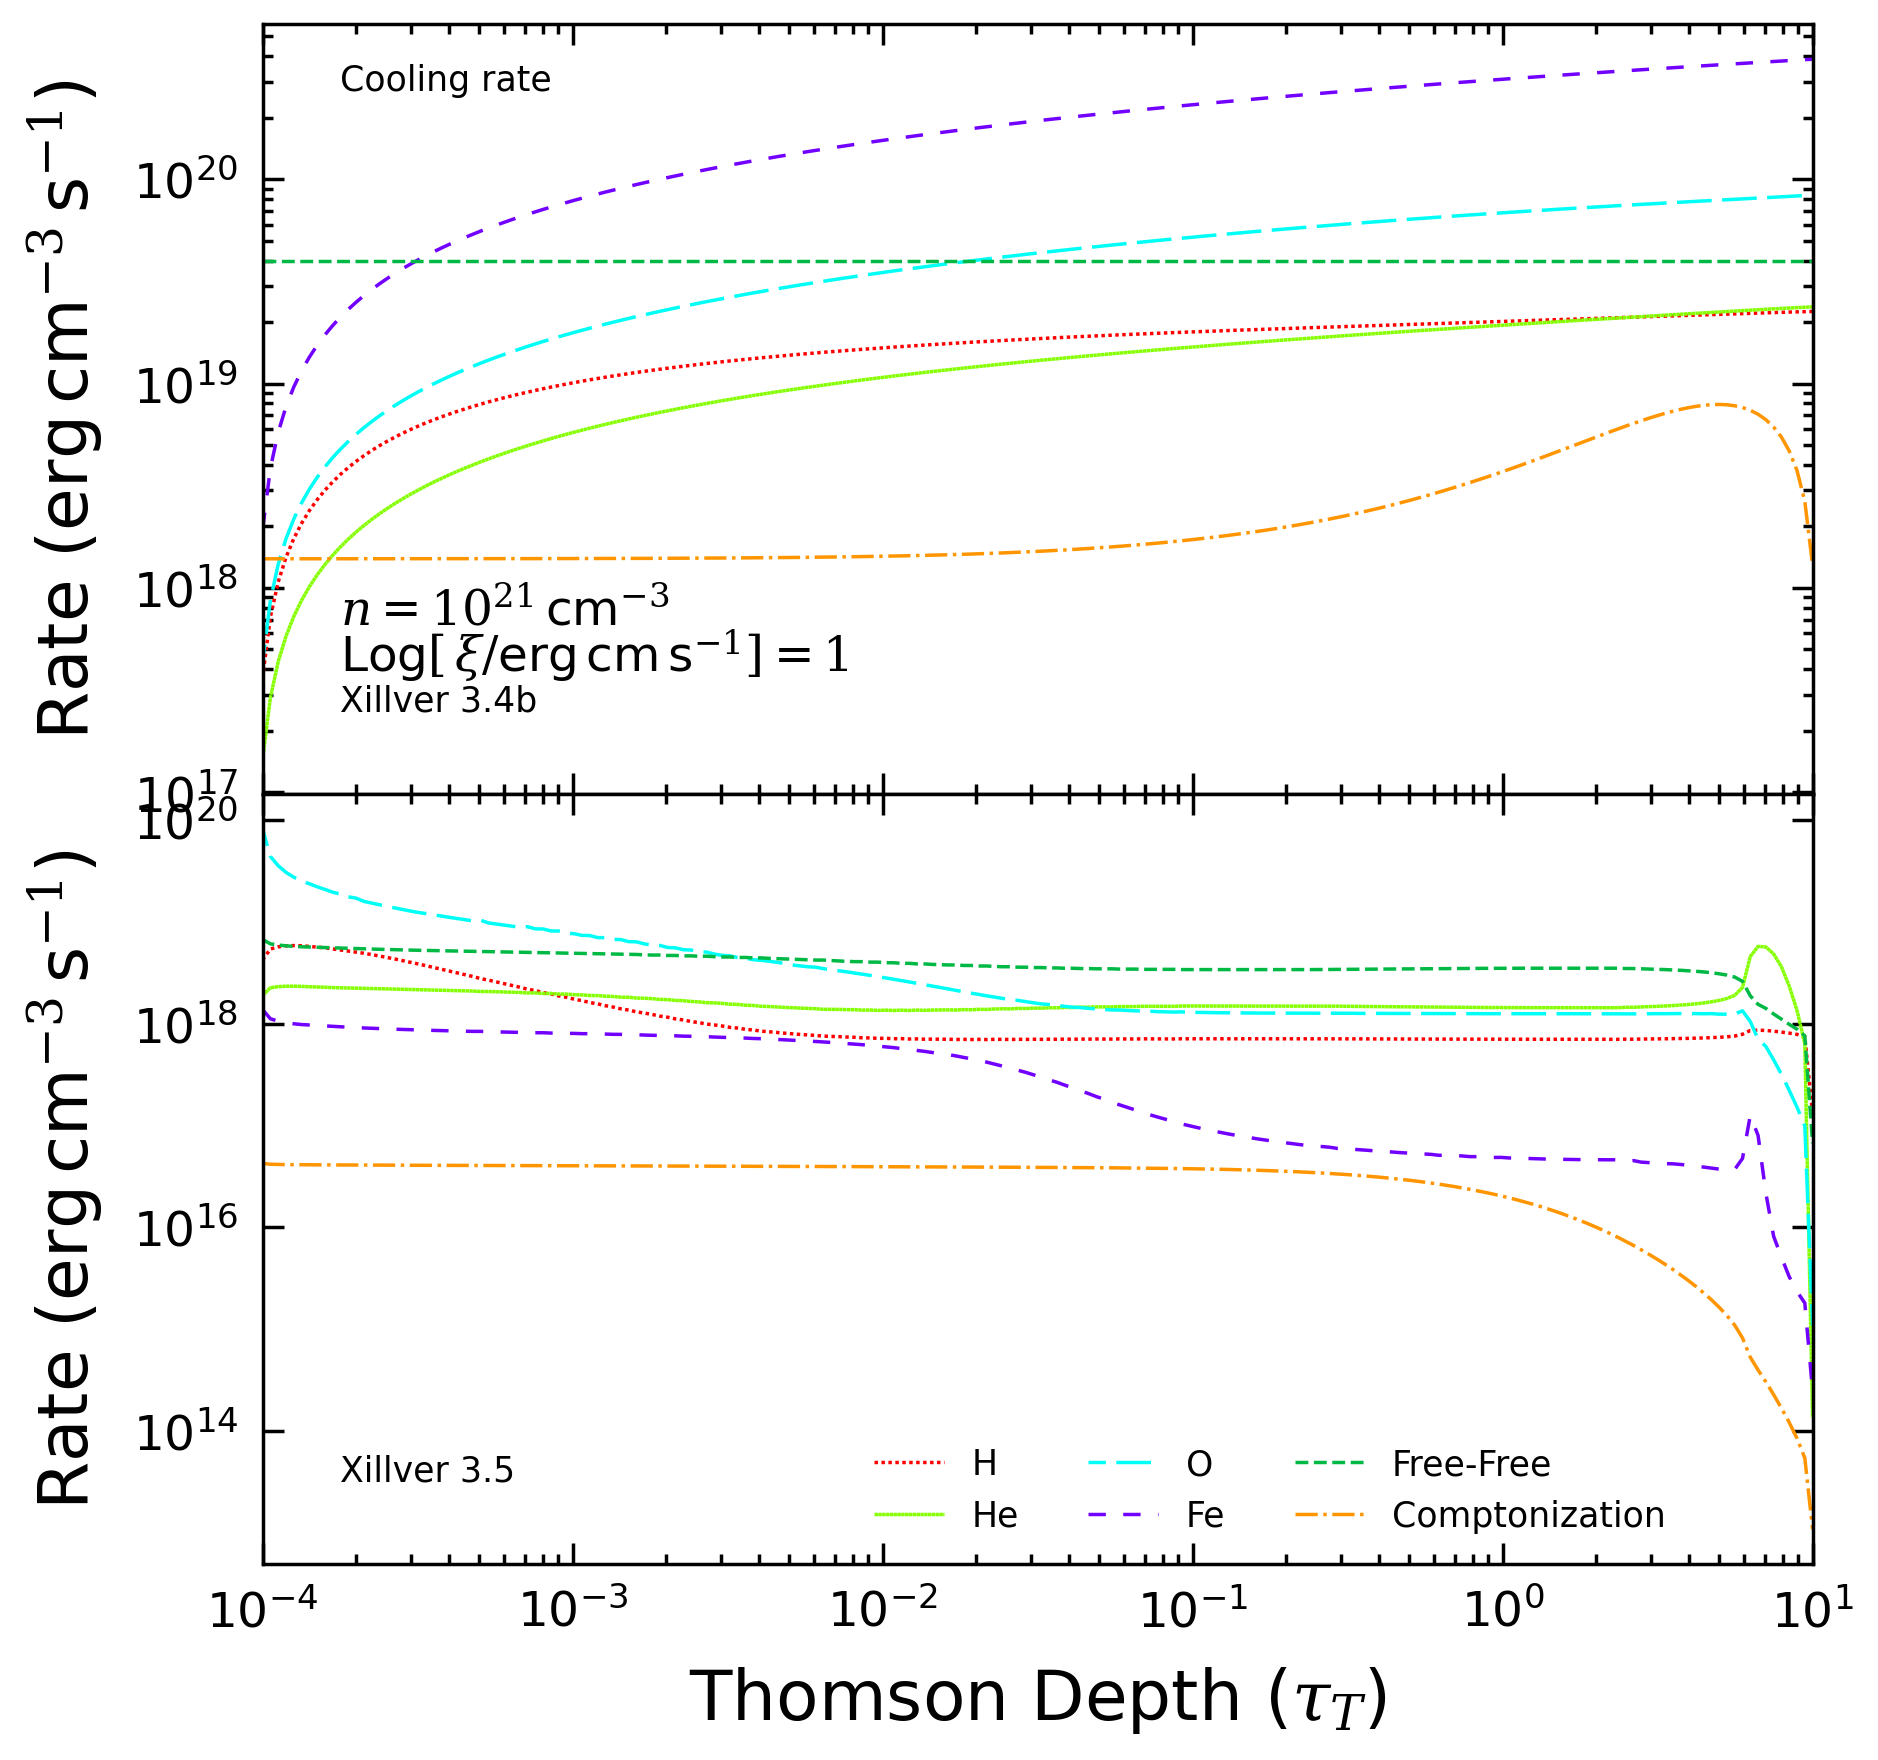

In [1379]:
##Comparing cooling profile for publication
import scienceplots
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":7,
"legend.fancybox":True})
lw=0.5
numrow=2
numcol=1

fig=plt.figure(figsize=(2*numrow,4*numcol),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axdict1={}
axdict2={}
ms=0.5
sm = plt.cm.ScalarMappable(cmap=cmap)
ionselect=plelements
nion=len(ionselect)
gion=[]
colors=matplotlib.cm.hsv(np.arange(nion)/nion)
ls=[(0, (1, 1)),(0, (1, 0.1)),(5, (10, 3)),(0, (5, 5)),(0, (5, 1)),(0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)),\
   (0, (3, 5, 1, 5, 1, 5)),(0, (3, 1, 1, 1, 1, 1)),(0, (5, 1)),(0, (5, 5))\
    ,(0, (3, 1, 1, 1, 1, 1)),(0, (1, 0.1)),(0, (5, 5))]

for eind,e in enumerate(ionselect):
    #print(e)
    #print(spect[layer-1][e])
    
    y1=np.array([data[e] for data in coolo])
    y2=np.array([data[e] for data in cool])
    if np.any(y1>10):
        pnum=len(axdict1)
        axdict1[e]=axs[0].plot(depth1,y1,color=colors[eind],lw=lw,ls=ls[pnum])
        gion.append(e)
    if np.any(y2>10):
        axdict2[e]=axs[1].plot(depth2,y2,color=colors[eind],lw=lw,ls=ls[pnum])
        
#Adding f-f and Comptonization etc.
mech='Free-Free'
axdict1[mech]=axs[0].plot(depth1,clfreef1,'--C1',lw=lw)
axdict2[mech]=axs[1].plot(depth2,clfreef2,'--C1',lw=lw)
gion.append(mech)
#mech='Recombination'
#axdict1[mech]=axs[0].plot(depth1,clrec1,'--C3',lw=lw)
#gion.append(mech)
#mech='Line Cooling'
#axdict1[mech]=axs[0].plot(depth1,cllines1,'-.C4',lw=lw)
#gion.append(mech)
mech='Comptonization'
axdict1[mech]=axs[0].plot(depth1,clcomp1,'-.C2',lw=lw)
axdict2[mech]=axs[1].plot(depth2,clcomp2,'-.C2',lw=lw)
gion.append(mech)
axs[0].text(0.05, 0.95,"Cooling rate",transform=axs[0].transAxes\
            ,verticalalignment='top',horizontalalignment='left',fontsize=5)
axs[0].text(0.05,0.22,r"$n=10^{%d}\,$cm$^{-3}$"%density,transform=axs[0].transAxes)
axs[0].text(0.05,0.16,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs[0].transAxes)
axs[0].text(0.05, 0.1,"Xillver 3.4b",transform=axs[0].transAxes\
            ,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
axs[1].text(0.05, 0.1,"Xillver 3.5",transform=axs[1].transAxes\
            ,verticalalignment='bottom',horizontalalignment='left',fontsize=5)
#axs[0].set_ylim([1e-13,1])
#axs[1].set_ylim([1e-13,1])
axs[0].set_xlim([1e-4,10])
axs[1].set_xlim([1e-4,10])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_xlabel(r"Thomson Depth ($\tau_{T}$)",fontsize=10)
axs[0].set_ylabel(r"Rate (erg$\,$cm$^{-3}\,$s$^{-1}$)",fontsize=10)
axs[1].set_ylabel(r"Rate (erg$\,$cm$^{-3}\,$s$^{-1}$)",fontsize=10)
axs[1].legend([axdict1[e] for e in gion],labels=gion,fontsize=5,ncol=3,loc='lower center',bbox_to_anchor=(0.65,0))
#axs[1].legend([axdict1[e] for e in feselected],labels=feselected)
#fig.savefig("./pub2/coolingrates_{}.pdf".format(datype))
#print(linetab[-1])
#gind=fraction>1e-15
#print(linetab[gind])
#print(fraction[gind])

In [190]:
from astropy.io import fits
import numpy as np
from os.path import join
from numpy import random
from scipy.integrate import simps

bN=5000

h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12
cut=0 #cutting at 1000 means ~2 eV==6200 A
#Darray=["15","18","21"]
#garray=["1.5","2"]
#xiarray=["2","3","3.7"]
Darray=["21"]
garray=["2"]
xiarray=["1"]

energy=[]
flux=[]

#for density in Darray:


for density in Darray:
    for gamma in garray:
        for logxi in xiarray:
            print(density,gamma,logxi)
            datype="n{}_logxi_{}".format(density,logxi)
            #datype="n{}_logxi_{}".format(density,logxi)
            rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2",datype)
            specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0)

            if len(specE2)>10*bN:
                ite=14
            else:
                ite=0
            skip=(bN+2)*ite

            specE2=np.loadtxt(join(rpath,"current/intensity"),usecols=0,max_rows=bN,skiprows=skip)
            foutE2=np.loadtxt(join(rpath,"current/intensity"),usecols=9,max_rows=bN,skiprows=skip)

            ind=foutE2<0
            foutE2[ind]=0
            
            fbin=[]
            for i in range(bN-1):
                fbin.append(simps(foutE2[i:i+2],specE2[i:i+2]*eV))
            energy.append(specE2[cut:4999]/1000)
            flux.append(fbin[cut:4999]/specE2[cut:4999]/eV)
    


21 2 1


In [212]:
from scipy.interpolate import interp1d
from scipy.integrate import simps

e_grid = np.logspace(np.log10(1e-2), np.log10(1000), 1000)
cumulative_integral = simps(foutE2,specE2)
#np.cumsum(np.insert(np.diff(specE2) * (foutE2[:-1] + foutE2[1:]) / 2, 0, 0))

interp_func_cumulative = interp1d(specE2, cumulative_integral, kind='linear', bounds_error=False, fill_value="extrapolate")
new_cumulative_integral = interp_func_cumulative(e_grid)

newfoutE2 = np.diff(new_cumulative_integral) / np.diff(e_grid)
e_grid_adjusted = e_grid[:-1] + np.diff(e_grid)/2


ValueError: x and y arrays must be equal in length along interpolation axis.

In [114]:
import numpy as np
cut1=0
#cut1=2500
cut2=4999

elow = 0.3 #keV
eup =  5 #keV

#cut1=np.argmin(np.abs(x/1e3-elow))
#cut2=np.argmin(np.abs(x/1e3-eup))


fx=foutE2
fd=foutdE2
x=specE2
fin=fionizE2

Lout=np.trapz(fx[cut1:cut2],x=x[cut1:cut2]*eV)
Loutd=np.trapz(fd[cut1:cut2],x=x[cut1:cut2]*eV)
Lin=np.trapz(fin[cut1:cut2],x=x[cut1:cut2]*eV)
print(Lout*4*np.pi/10**(density)/1.2,Loutd*4*np.pi/10**(density)/1.2,Lin*4*np.pi/10**(density)/1.2,)
print((Loutd+Lout-Lin)/Lin)
print("integrating in energy range (keV):",x[cut1]/1000,x[cut2]/1000)
print("fraction of flux in this range:",(Lout+Loutd)/Lin)
#Linrx=np.trapz(rxinput[2][cut:]*fac/rxinput[0][cut:],x=rxinput[0][cut:]*1e3*eV)
#Loutrx=np.trapz(rxinput[3][cut:]*fac/rxinput[0][cut:],x=rxinput[0][cut:]*1e3*eV)

# check energy conservation
# check whether there's an optimal itrans or a better way to set up grid
# adaptive grid?
# figure out which models are very wrong in the paper

# changes in paper structure:
# 1. remove model 4, just mention it in the text
# 2. whether radiative excitation was working in the old ? need conversation with Tim
# 3. Comparison with Reflionx should appear later in the paper, after or around 3.4
# 4. change figure 1,2 such that it is referring to the model in the table
# 5. explicitly state what changed in each ATDB

7.4666108995255005 0.015344385956351583 8.682494146462936
-0.13827119727689743
integrating in energy range (keV): 0.0001 1000.101523696772
fraction of flux in this range: 0.8617288027231026


In [93]:

#print((Linrx-Loutrx)/Linrx)
#print(Loutrx*4*np.pi/1e20,Linrx*4*np.pi/1e20)

5.9568099247876285 0.0009521609275769599 3.4697082551508296
0.7170786843161312
integrating in energy range (keV): 0.29999360866299996 5.005599496317
fraction of flux in this range: 0.5957762085715206


In [923]:
Linrx=np.trapz(rxinput2[1][cut1:cut2]*fac/rxinput2[0][cut1:cut2],x=rxinput2[0][cut1:cut2]*1e3*eV)
Loutrx=np.trapz(rxinput2[2][cut1:cut2]*fac/rxinput2[0][cut1:cut2],x=rxinput2[0][cut1:cut2]*1e3*eV)

In [924]:
print(Linrx,Loutrx)
print(Loutrx*4*np.pi/1e20,Linrx*4*np.pi/1e20)

0.0 0.0
0.0 0.0


/tmp/ipykernel_883090/1305926571.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0,200])


(4.466813248233312e-05, 200)

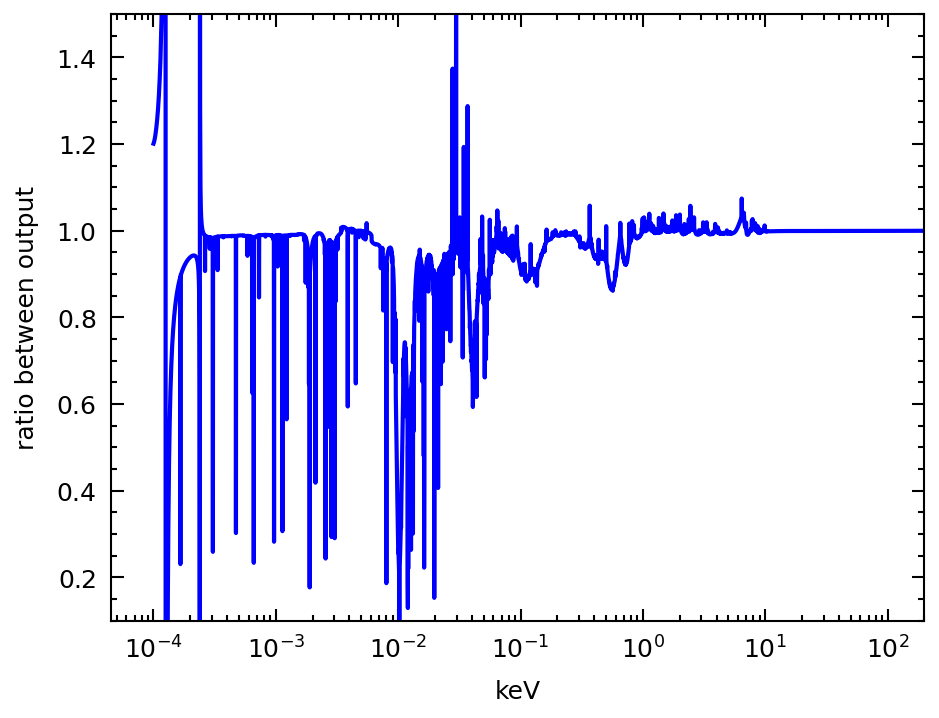

In [68]:
fig=plt.figure(dpi=300)
plt.plot(specE2/1e3,foutE3/foutE2,"b")
#plt.plot(np.arange(0,200),temp3,"r")
plt.ylim([0.1,1.5])
#plt.yscale("log")
plt.xscale("log")
plt.xlabel("keV")
plt.ylabel("ratio between output")
plt.xlim([0,200])

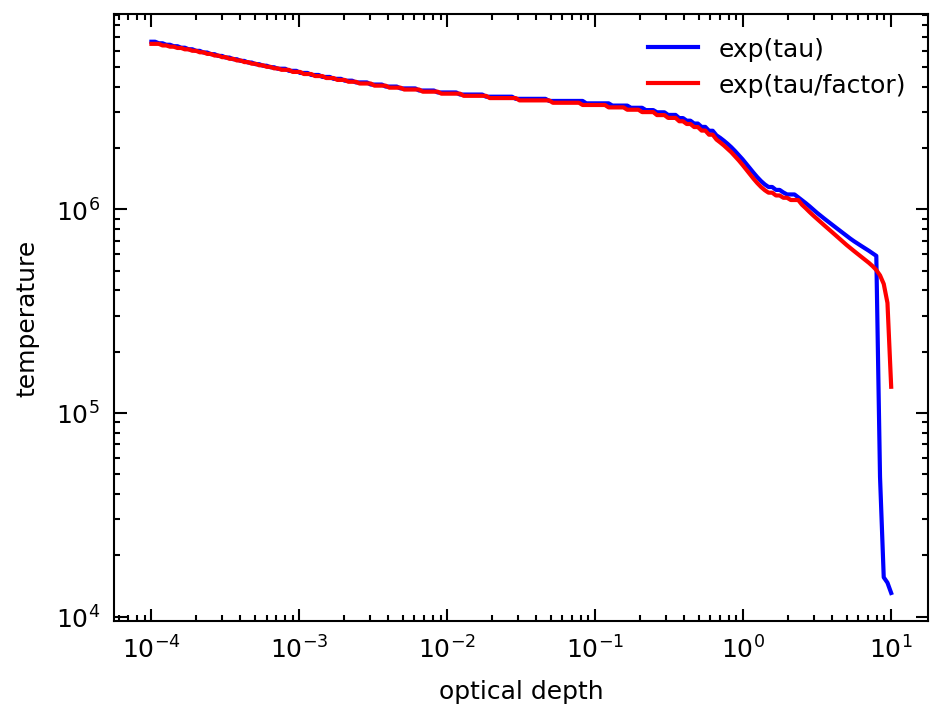

In [69]:
fig=plt.figure(dpi=300)
plt.plot(depth2,temp2,"b",label="exp(tau)")
plt.plot(depth3,temp3,"r",label="exp(tau/factor)")
#plt.ylim([0.1,1.5])
plt.yscale("log")
plt.xscale("log")
plt.xlabel("optical depth")
plt.ylabel("temperature")
plt.legend()
#plt.xlim([0,200])

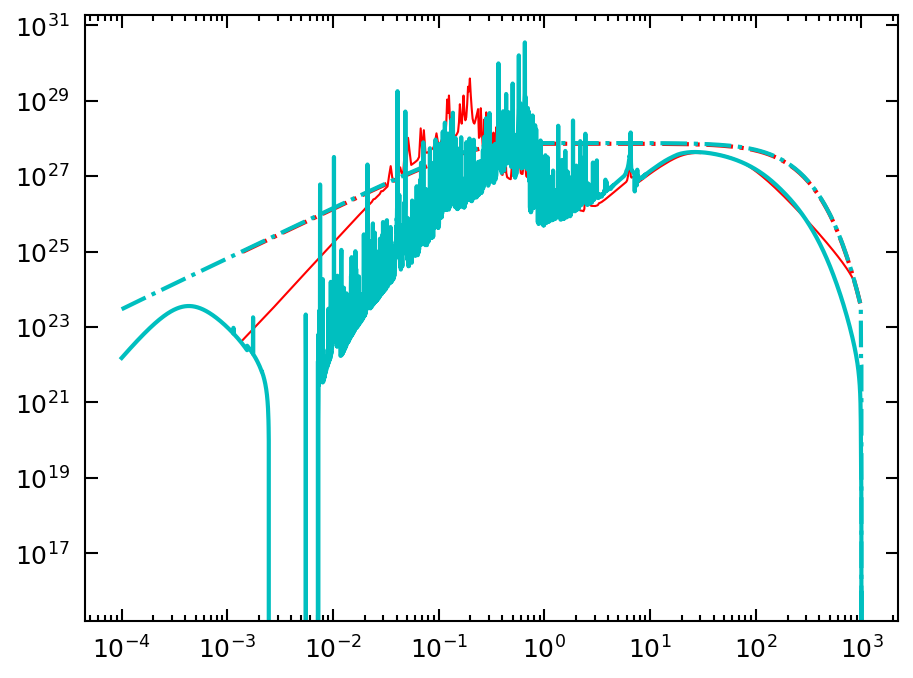

In [250]:

fig=plt.figure(dpi=300)
plt.plot(rxinput[0],fac*rxinput[2],"r-.")
plt.plot(rxinput[0],fac*rxinput[3],"r",label="Reflionx",lw=0.5)

#plt.plot(rxinput2[0],fac*rxinput2[2],"k-.")
#plt.plot(rxinput2[0],fac*rxinput2[3],"k",label="Reflionx_jj",lw=0.5)

plt.plot(specE2/1e3,foutE2*specE2/1e3,"c",label="Xillver_3.4b",ms=1)
plt.plot(specE2/1e3,fionizE2*specE2/1e3,"c-.",ms=0.5)
plt.xscale("log")
plt.yscale("log")

In [154]:
Lrefx=np.trapz(rxmo[cut:]*rx[cut:]*1e3*eV,x=rx[cut:])

In [156]:
Lff=1e21*10/(4*np.pi)
Lrefx*4*np.pi/1e21

7.783387111906553e-30

n15_logxi_1 :in spec1, ite=0
15
n18_logxi_1 :in spec1, ite=0


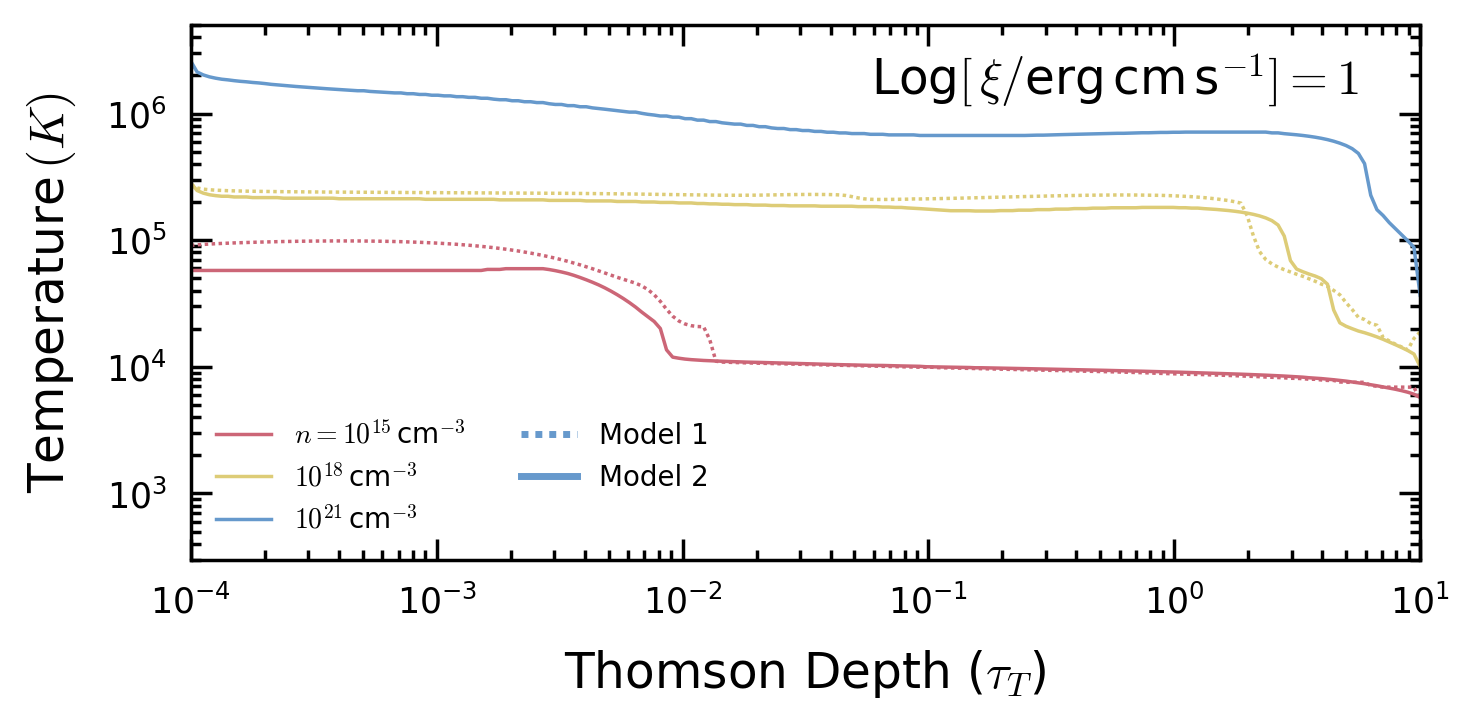

In [78]:
#Comparing different iterations
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from os.path import join
import scienceplots
from matplotlib.lines import Line2D
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":5,
"legend.fancybox":True})
colors=["#CC6677","#DDCC77","#6699CC"]
darray=[15,18,21]
logxi=1

eV=1.602e-12
kb=1.3807e-16


numrow=1
numcol=1
lw=0.5
cmap = matplotlib.cm.get_cmap('hsv')
sm = plt.cm.ScalarMappable(cmap=cmap)
#colors=matplotlib.cm.hsv(np.arange(len(darray))/len(darray))

fig=plt.figure(figsize=(3*numcol,1.5*numrow),dpi=500)
gs = fig.add_gridspec(numrow,numcol,hspace=0)
axs=gs.subplots(sharex=True)
lines=[]

for dind,density in enumerate(darray):
    datype="n{}_logxi_{}".format(density,logxi)
    rpatho=join("/disk/bifrost/yuanze/xillver_res/ktbb1",datype+"_bin5000")
    rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_modified",datype)
    rpath3=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2",datype)

   # if density != 21:
    specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0)
    if len(specE1)>2*bN:
        ite=14
    else:
        print(datype,":in spec1, ite=0")
        ite=0

    depth1=np.loadtxt(join(rpatho,"current/temper"),usecols=0,max_rows=200,skiprows=0)
    tempeV1=np.loadtxt(join(rpatho,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
    temp1=tempeV1*eV/kb


   # specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0)
   # if len(specE2)>2*bN:
   #     ite=14
   # else:
   #     print(datype,":in spec2, ite=0")
   #     ite=0

    #depth2=np.loadtxt(join(rpath,"current/temper"),usecols=0,max_rows=200,skiprows=(200+2)*ite)
    #tempeV2=np.loadtxt(join(rpath,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
    #temp2=tempeV2*eV/kb

    specE3=np.loadtxt(join(rpath3,"current/spectr"),usecols=0)
    if len(specE3)>2*bN:
        ite=14
    else:
        print(datype,":in spec3, ite=0")
        ite=0

    depth3=np.loadtxt(join(rpath3,"current/temper"),usecols=0,max_rows=200,skiprows=(200+2)*ite)
    tempeV3=np.loadtxt(join(rpath3,"current/temper"),usecols=1,max_rows=200,skiprows=(200+2)*ite)
    temp3=tempeV3*eV/kb

    if dind==0:
        if density != 21:
            axs.plot(depth1,temp1,color=colors[dind],lw=lw,ls=(0, (1, 1)))
        #    axs.plot(depth2,temp2,color=colors[dind],lw=lw,ls='-')
            line,=axs.plot(depth3,temp3,color=colors[dind],lw=lw,ls='-',label=r"$n=10^{%d}\,$cm$^{-3}$"%density)
            print(density)
    else:
        if density != 21:
            axs.plot(depth1,temp1,color=colors[dind],lw=lw,ls=(0, (1, 1)))
        #    axs.plot(depth2,temp2,color=colors[dind],lw=lw,ls='-')
        line,=axs.plot(depth3,temp3,color=colors[dind],lw=lw,ls='-',label=r"$10^{%d}\,$cm$^{-3}$"%density)
    lines.append(line)
    #axdict1[density]=lines1
    #axdict2[density]=lines2
proxy_line1 = Line2D([], [], linestyle=(0, (1, 1)), color=colors[dind], label="Model 1")
#proxy_line2 = Line2D([], [], linestyle='-', color=colors[dind], label="Xillver 3.5(ATDB2021)")
proxy_line3 = Line2D([], [], linestyle='-', color=colors[dind], label="Model 2")
lines.append(proxy_line1)
#lines.append(proxy_line2)
lines.append(proxy_line3)
labels=[l.get_label() for l in lines]
#labels=[axdict1[density].get_label() for density in darray]
#labels[0]=r"Xillver$\,$3.4b$\,$"+labels[0]

#axs.legend([axdict1[density] for density in darray],ncols=4,labels=labels\
#              ,loc='best')
axs.legend(lines,labels,ncols=2,loc='lower left',fontsize=4)
#axs[0].legend(fontsize=2)
#axs[1].legend(fontsize=2)
#axs[0].set_title("Spectrum")
#axs[1].set_title("Temperature profile")
axs.text(0.95,0.95,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs.transAxes,\
         verticalalignment='top',horizontalalignment='right',fontsize=7)
axs.set_xscale("log")
axs.set_yscale("log")
axs.set_xlim([1e-4,10])
axs.set_xlabel(r"Thomson Depth ($\tau_{T}$)",fontsize=7)
axs.set_ylabel("Temperature$\,(K)$",fontsize=7)

#axs[0].set_xscale("log")
#axs[0].set_yscale("log")
#axs[0].set_xlim([1e-4,10])
axs.set_ylim([3e2,5e6])
#axs[0].set_xlabel(r"$\tau_{T}$")
#axs[0].set_ylabel("Temperature$\,(K)$")
fig.tight_layout()
fig.savefig("/disk/bifrost/yuanze/my_work/pub2/temp_profile_logxi_{}.pdf".format(logxi))

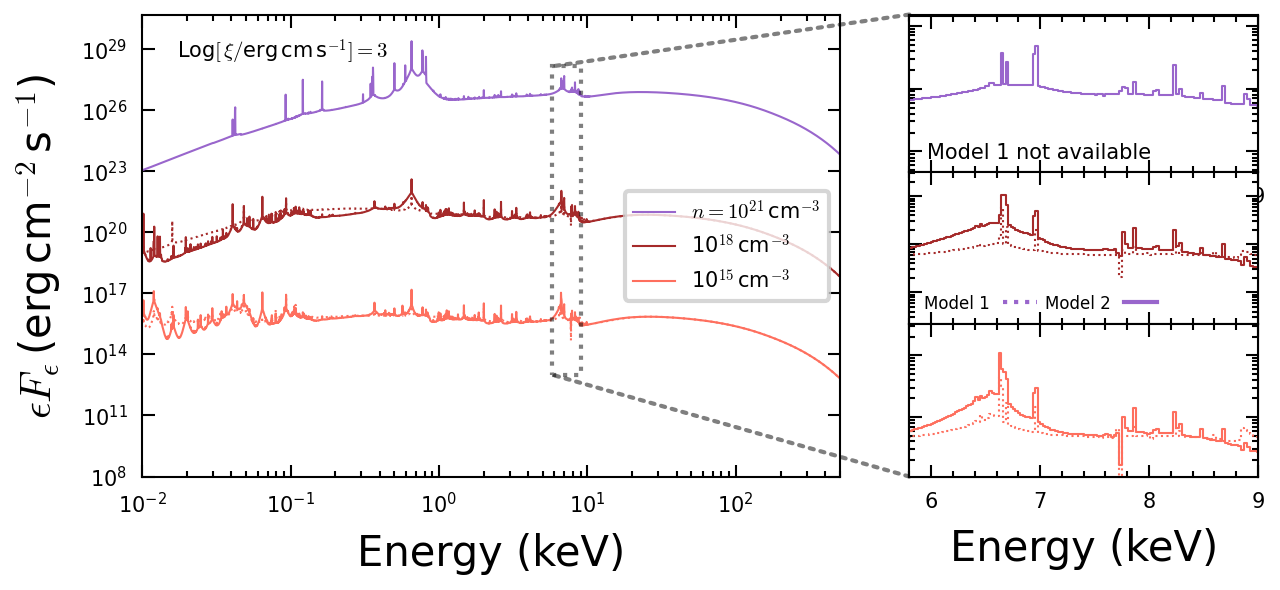

In [13]:
from astropy.io import fits
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from numpy import random
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scienceplots
from matplotlib.lines import Line2D
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":5,
"legend.fancybox":True})
colors=["#CC6677","#DDCC77","#6699CC"]
#specnnum="1"
bN=5000
h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12

lw=0.5
numrow=1
numcol=1

fig=plt.figure(figsize=(3*numcol,2*numrow),dpi=300)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)

axins=axs.inset_axes([1.1,0.0,0.5,1])

axins0=axs.inset_axes([1.1,0.66,0.5,0.337])
axins1=axs.inset_axes([1.1,0.33,0.5,0.33])
axins2=axs.inset_axes([1.1,0.0,0.5,0.33])

axinsarray=[axins0,axins1,axins2]



fac=1.6e11


darray=[21,18,15]
fac=[1e5,1e2,1]
stretch=[1e2,5e2,1e2]
logxi=3
ymost=1e27
ylow=1e13
lines=[]
colorlst1=["#CC6677","#DDCC77","#6699CC"]
colorlst2=["#9966cc","#a52a2a","#fe6f5e"]
for dind,density in enumerate(darray):
    

    datype="n{}_logxi_{}".format(density,logxi)
    rpatho=join("/disk/bifrost/yuanze/xillver_res/ktbb1",datype+"_bin5000")
    rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2",datype)
    specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0)
    if len(specE1)>13*bN:
        ite=14
    else:
        ite=0

    skip=(bN+2)*ite

    specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
    foutE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
    

    specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0)
    if len(specE2)>2*bN:
        ite=14
    else:
        ite=0

    skip=(bN+2)*ite

    specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
    foutE2=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)

    #Setting negative fluxes to zero
    find=foutE2<0
    foutE2[find]=0.

    #axs.plot(specE1/1e3,foutE1*eV*specE1,"c",label="Xillver_3.4b",lw=lw)
    #axs.plot(specE1/1e3,fionizE1*eV*specE1,"c-.",ms=0.5)
    #plotting Xillver 3.4b, overriding logn=21
    if density != 21:
        axs.plot(specE1/1e3,fac[dind]*foutE1*eV*specE1,ms=0.5,ls=':',color=colorlst2[dind],lw=lw)
        #axins.plot(specE1/1e3,fac[dind]*foutE1*eV*specE1,ls=':',color=colorlst[dind],lw=lw)
        axinsarray[dind].step(specE1/1e3,fac[dind]*foutE1*eV*specE1,ls=':',color=colorlst2[dind],lw=lw)
    #ploting Xillver 3.5, 
    if dind==0:
        line,=axs.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,ls="-",color=colorlst2[dind],label=r"$n=10^{%d}\,$cm$^{-3}$"%density,lw=lw)
        #axins.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst[dind],lw=lw)
        axinsarray[dind].step(specE2/1e3,fac[dind]*foutE2*eV*specE2,ls='-',color=colorlst2[dind],lw=lw)
    else:
        line,=axs.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst2[dind],label=r"10$^{%d}\,$cm$^{-3}$"%density,lw=lw)
        #axins.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst[dind],lw=lw)
        axinsarray[dind].step(specE2/1e3,fac[dind]*foutE2*eV*specE2,ls='-',color=colorlst2[dind],lw=lw)
    #axs.plot(specE2/1e3,fionizE2*eV*specE2,"b-.",ms=0.5)
    yup=np.max(fac[dind]*foutE2[3300:3500]*eV*specE2[3300:3500])
    upfac=3
    if yup*upfac > ymost:
        ymost=yup*upfac
    if yup/100*(dind+1)<ylow:
        ylow=yup/100*(dind+1)
    axinsarray[dind].set_yscale("log")
    axinsarray[dind].set_yticklabels([])
    if dind !=0:
        axinsarray[dind].set_xticklabels([])
    axinsarray[dind].set_xlim([5.8,9])
    axinsarray[dind].set_ylim([yup/stretch[dind],yup*upfac])

    lines.append(line)


proxy_line1 = Line2D([], [], linestyle=':', color=colorlst2[0], label="Model 1")
proxy_line2 = Line2D([], [], linestyle='-', color=colorlst2[0], label="Model 2")
prolines=[]
prolines.append(proxy_line1)
prolines.append(proxy_line2)
labels=[l.get_label() for l in prolines]
#pfac=8e22
#plt.plot(xvals,pfac*np.array(yvals),"g",label="pexrav")
#plt.plot(xorgvals,pfac*np.array(yorgvals),"g--")


axs.set_xscale("log")
#axs.legend(lines,labels,loc='lower right')
axs.legend(loc='center right',frameon=True)
axs.set_yscale("log")
axs.set_xlabel("Energy (keV)",fontsize=10)
axs.set_ylabel(r"$\epsilon F_{\epsilon}\,$(erg$\,$cm$^{-2}\,$s$^{-1}$)",fontsize=10)
axs.set_xlim([1e-2,500])
axs.set_ylim([1e8,5e30])
axs.text(0.05,0.95,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs.transAxes\
         ,verticalalignment='top',horizontalalignment='left')





axins.set_xlim([5.8,9])
axins.set_ylim([ylow,ymost])
#axins.set_xscale("log")
axins.set_yscale("log")
axins.set_yticklabels([])
axins.set_xlabel("Energy (keV)",fontsize=10)
rec,clines=axs.indicate_inset_zoom(axins,edgecolor="k",ls=':')
clines[0].set_linestyle(':')
clines[1].set_linestyle(':')

axinsarray[1].legend(prolines,labels,loc='lower left',columnspacing=0.5,ncol=2,bbox_to_anchor=[0.0, -0.02],markerfirst=False,fontsize=4)
axinsarray[0].text(0.05,0.06,"Model 1 not available",transform=axinsarray[0].transAxes\
         ,verticalalignment='bottom',horizontalalignment='left')




#axs.indicate_inset(5, 10, 1e14, 5e28,axins)


fig.savefig("/disk/bifrost/yuanze/my_work/pub2/newcode_allspec_logxi_{}.pdf".format(logxi))

In [ ]:
from astropy.io import fits
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
from numpy import random
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scienceplots
from matplotlib.lines import Line2D
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":5,
"legend.fancybox":True})

#specnnum="1"
bN=5000
h=6.626e-27
hev=4.135667696e-15 #(eV/Hz)
kb=1.3807e-16
eV=1.602e-12

lw=0.3
numrow=1
numcol=1

fig=plt.figure(figsize=(3*numcol,2*numrow),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)

axins=axs.inset_axes([1.1,0.0,0.5,1])

fac=1.6e11


darray=[15,18,21]
fac=[1,1e2,1e5]
logxi=3
lines=[]
colorlst=["#CC6677","#DDCC77","#6699CC"]
for dind,density in enumerate(darray):
    datype="n{}_logxi_{}".format(density,logxi)
    rpatho=join("/disk/bifrost/yuanze/xillver_res/ktbb1",datype+"_bin5000")
    rpath=join("/disk/bifrost/yuanze/xillver_res/xillver3.5_mo2",datype)
    specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0)
    if len(specE1)>13*bN:
        ite=14
    else:
        ite=0

    skip=(bN+2)*ite

    specE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
    foutE1=np.loadtxt(join(rpatho,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)
    

    specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0)
    if len(specE2)>2*bN:
        ite=14
    else:
        ite=0

    skip=(bN+2)*ite

    specE2=np.loadtxt(join(rpath,"current/spectr"),usecols=0,max_rows=bN,skiprows=skip)
    foutE2=np.loadtxt(join(rpath,"current/spectr"),usecols=1,max_rows=bN,skiprows=skip)

    #Setting negative fluxes to zero
    find=foutE2<0
    foutE2[find]=0.

    #axs.plot(specE1/1e3,foutE1*eV*specE1,"c",label="Xillver_3.4b",lw=lw)
    #axs.plot(specE1/1e3,fionizE1*eV*specE1,"c-.",ms=0.5)
    if density != 21:
        axs.plot(specE1/1e3,fac[dind]*foutE1*eV*specE1,ms=0.5,ls=':',color=colorlst[dind],lw=lw)
        axins.plot(specE1/1e3,fac[dind]*foutE1*eV*specE1,ls=':',color=colorlst[dind],lw=lw)
    if dind==0:
        line,=axs.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst[dind],label=r"$n=10^{%d}\,$cm$^{-3}$"%density,lw=lw)
        axins.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst[dind],lw=lw)
    else:
        line,=axs.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst[dind],label=r"10$^{%d}\,$cm$^{-3}$"%density,lw=lw)
        axins.plot(specE2/1e3,fac[dind]*foutE2*eV*specE2,ms=0.5,color=colorlst[dind],lw=lw)
    #axs.plot(specE2/1e3,fionizE2*eV*specE2,"b-.",ms=0.5)
    lines.append(line)
proxy_line1 = Line2D([], [], linestyle=':', color=colorlst[0], label="Xillver 3.4b")
proxy_line2 = Line2D([], [], linestyle='-', color=colorlst[0], label="Xillver 3.5")
prolines=[]
prolines.append(proxy_line1)
prolines.append(proxy_line2)
labels=[l.get_label() for l in prolines]
#pfac=8e22
#plt.plot(xvals,pfac*np.array(yvals),"g",label="pexrav")
#plt.plot(xorgvals,pfac*np.array(yorgvals),"g--")


axs.set_xscale("log")
#axs.legend(lines,labels,loc='lower right')
axs.legend(loc='lower right',frameon=True)
axs.set_yscale("log")
axs.set_xlabel("Energy (keV)",fontsize=10)
axs.set_ylabel(r"$\epsilon F_{\epsilon}\,$(erg$\,$cm$^{-2}\,$s$^{-1}$)",fontsize=10)
axs.set_xlim([1e-2,500])
axs.set_ylim([1e13,5e30])
axs.text(0.05,0.95,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs.transAxes\
         ,verticalalignment='top',horizontalalignment='left')





axins.set_xlim([5,10])
axins.set_ylim([5e14,1e29])
#axins.set_xscale("log")
axins.set_yscale("log")
axins.set_yticklabels([])
axins.set_xlabel("Energy (keV)",fontsize=10)
axins.legend(prolines,labels,loc='lower right',bbox_to_anchor=[1.0, 0.6],markerfirst=False)
rec,clines=axs.indicate_inset_zoom(axins,edgecolor="k",ls=':')
clines[0].set_linestyle(':')
clines[1].set_linestyle(':')
#axs.indicate_inset(5, 10, 1e14, 5e28,axins)


fig.savefig("./pub2/newcode_allspec_logxi_{}.pdf".format(logxi))

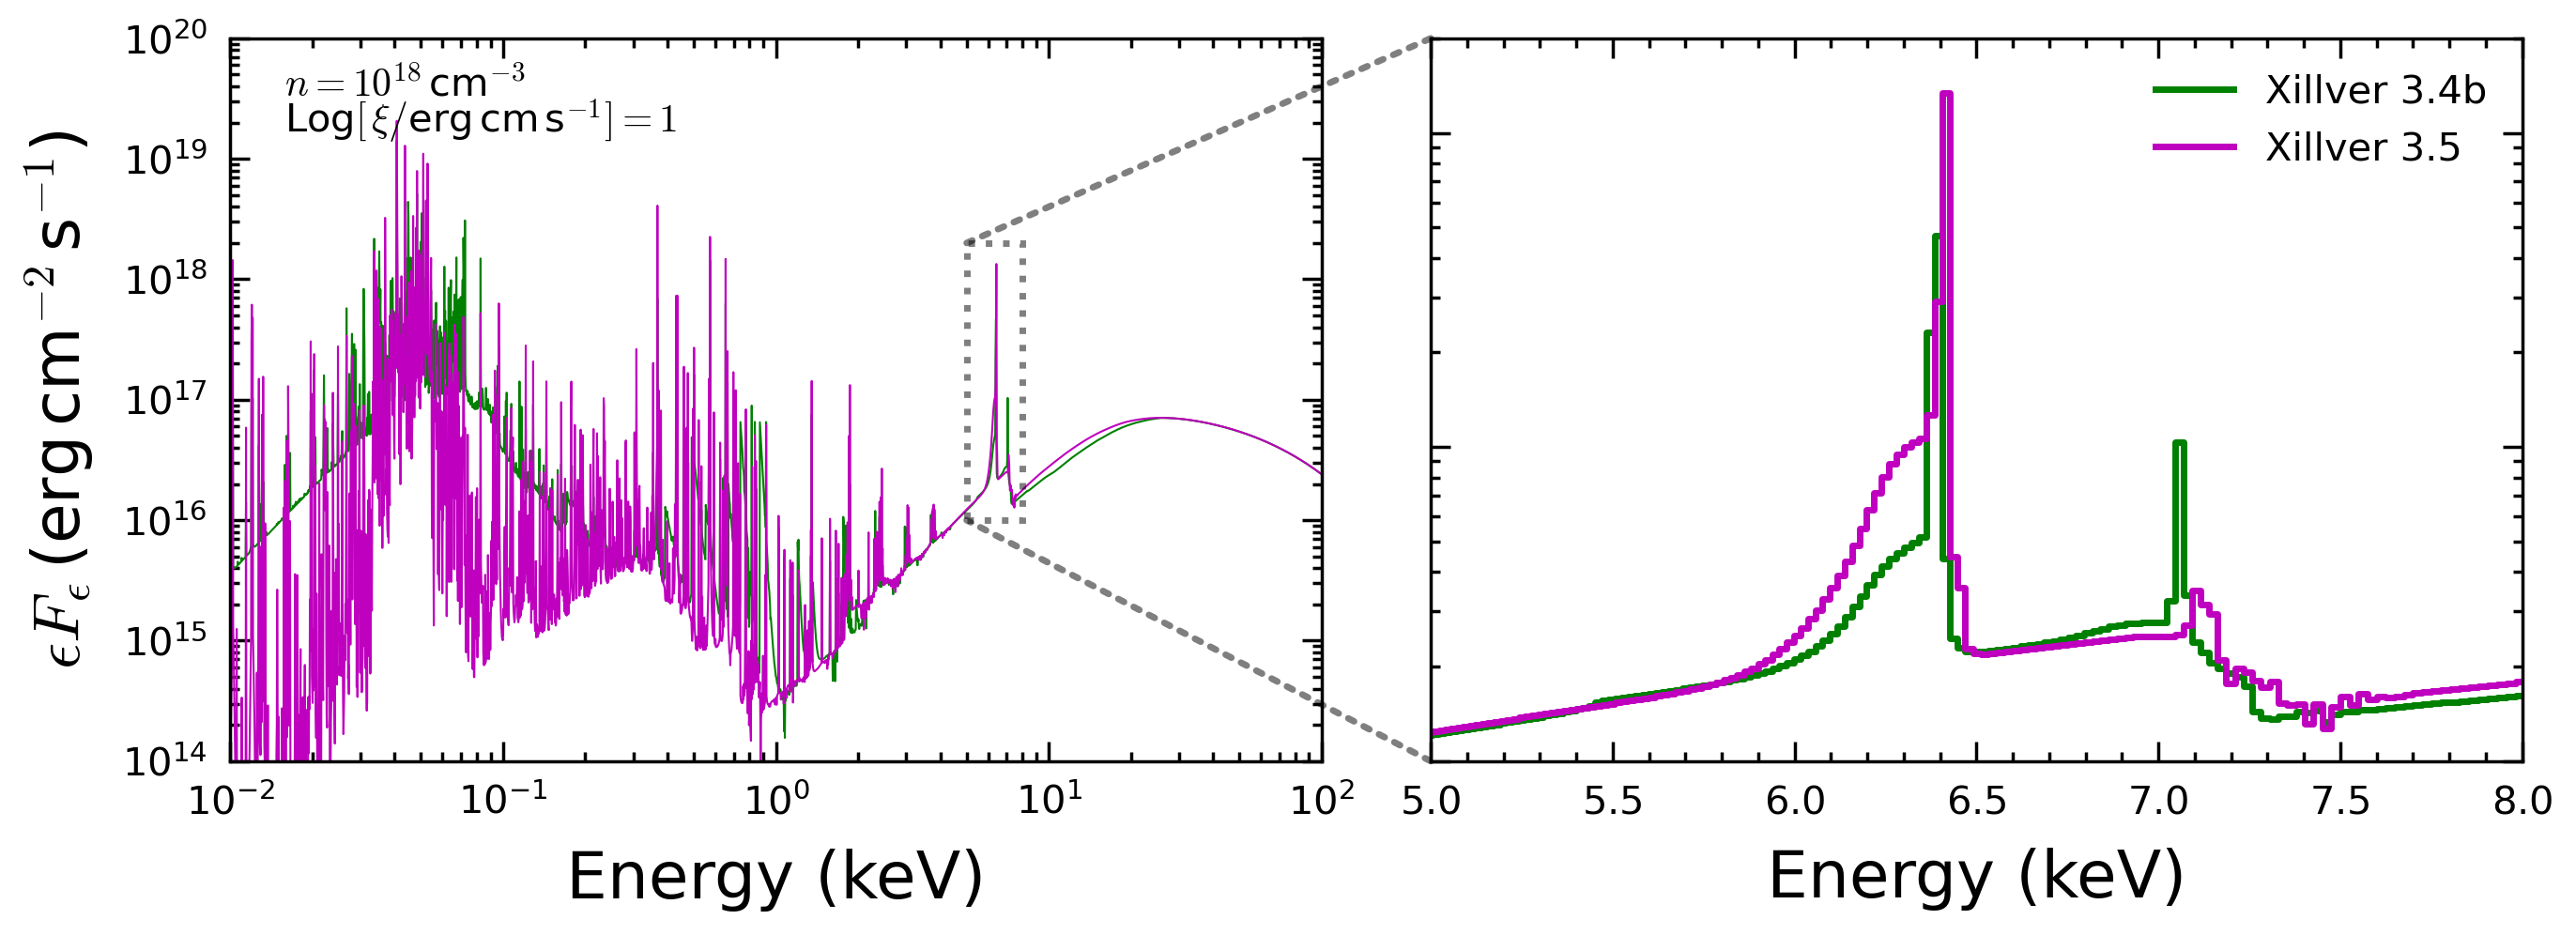

In [93]:
#Ploting spectra for publication
import scienceplots
import matplotlib.pyplot as plt
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":6,
"legend.fancybox":True})

lw=1
numrow=1
numcol=1
#colorlst=["#CC6677","#6699CC","#88CCEE"]
colorlst=["g","m"]
fig=plt.figure(figsize=(3*numcol,2*numrow),dpi=500)
gs = fig.add_gridspec(numrow,numcol, hspace=0)
axs=gs.subplots(sharex=True)
axins=axs.inset_axes([1.1,0.0,1.0,1])

diff1=np.abs(rx-20)
diff2=np.abs(specE2/1e3-20)
ind1=np.argmin(diff1)
ind2=np.argmin(diff2)
fac=foutE2[ind2]*eV*specE2[ind2]/rxmo[ind1]

#Setting negative fluxes to zero
find=foutE2<0
foutE2[find]=0.


#axs.plot(rx,fac*rxmo,color=colorlst[0],label="Reflionx",lw=lw)
#axs.plot(rxinput[0],fac*rxinput[2],"r-.")

axs.plot(specE1/1e3,foutE1*eV*specE1,color=colorlst[0],label="Xillver 3.4b",lw=0.3)
axins.step(specE1/1e3,foutE1*eV*specE1,color=colorlst[0],label="Xillver 3.4b",lw=lw)

#axs.plot(specE1/1e3,fionizE1*eV*specE1,"c-.",ms=0.5)

axs.plot(specE2/1e3,foutE2*eV*specE2,color=colorlst[1],ms=0.5,label="Xillver 3.5",lw=0.3)
axins.step(specE2/1e3,foutE2*eV*specE2,color=colorlst[1],ms=0.5,label="Xillver 3.5",lw=lw)

#axs.plot(specE2/1e3,fionizE2*eV*specE2,"b-.",ms=0.5)
#axs.plot(specE3/1e3,foutE3*eV*specE3,"C2",ms=0.5,label="Xillver 3.5(ATDB2021)",lw=lw)

#pfac=8e22
#plt.plot(xvals,pfac*np.array(yvals),"g",label="pexrav")
#plt.plot(xorgvals,pfac*np.array(yorgvals),"g--")


axs.set_xscale("log")
#axs.legend(loc='best')
axs.set_yscale("log")
axs.set_xlabel("Energy (keV)",fontsize=10)
axs.set_ylabel(r"$\epsilon F_{\epsilon}\,$(erg$\,$cm$^{-2}\,$s$^{-1}$)",fontsize=10)
axs.set_xlim([1e-2,100])
axs.set_ylim([1e14,1e20])
#plt.axvline(x=)
#axs=plt.gca()
axs.text(0.05,0.92,r"$n=10^{%d}\,$cm$^{-3}$"%density,transform=axs.transAxes)
axs.text(0.05,0.87,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%d $"%logxi,transform=axs.transAxes)






axins.set_xlim([5,8])
axins.set_ylim([1e16,2e18])
#axins.set_xscale("log")
axins.set_yscale("log")
axins.set_yticklabels([])
axins.set_xlabel("Energy (keV)",fontsize=10)
#axins.legend(loc='upper right',bbox_to_anchor=[1.0, 0.6],markerfirst=False)
axins.legend()
rec,clines=axs.indicate_inset_zoom(axins,edgecolor="k",ls=':')
clines[0].set_linestyle(':')
clines[1].set_linestyle(':')


plt.savefig("./pub2/APRAcompRX"+datype+".pdf",dpi=300)

In [46]:
#AllModels.lmod("relxill", dirPath="/disk/bifrost/yuanze/software/relxill")
import os
os.chdir("/disk/bifrost/yuanze/multiAGN/PKS2131/swift")
Xset.restore("/disk/bifrost/yuanze/multiAGN/PKS2131/swift/PKS2131_pow_best.xcm")
Fit.statMethod ="cstat"
Plot.xAxis = "keV"


Plot.setRebin(minSig=2,maxBins=1000,groupNum=-1,errType="quad")
Plot("euf emo res")

x=Plot.x(1,plotWindow=1)
y=Plot.y(1,plotWindow=1)
yerr=Plot.yErr(1,plotWindow=1)

xm=Plot.x(1,plotWindow=2)
ym=Plot.model(1,plotWindow=2)

xra=Plot.x(1,plotWindow=3)
yra=Plot.y(1,plotWindow=3)
yraerr=Plot.yErr(1,plotWindow=3)

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.

***Warning: The file sent to Xset.restore(): /disk/bifrost/yuanze/multiAGN/PKS2131/swift/PKS2131_pow_best.xcm
    is not detected to be a file generated from Xset.save().
    Xset.restore() usage is only intended for Xset.save() output.
    General XSPEC/Tcl scripts may not fully execute in PyXspec.



Fit statistic  : Chi-Squared                   297.2     using 295 bins.

Test statistic : Chi-Squared                   297.2     using 295 bins.
 Null hypothesis probability of 4.0e-01 with 292 degrees of freedom
 Current data and model not fit yet.

Spectrum #: 1 replaced 

1 spectrum  in use
 
Spectral Data File: interval0pc.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.950e-02 +/- 1.205e-03 (98.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-378
  Telescope: SWIFT Instrument: XRT  Channel Type: PI
  Exposure Time: 2.068e+04 sec
 Using fit s

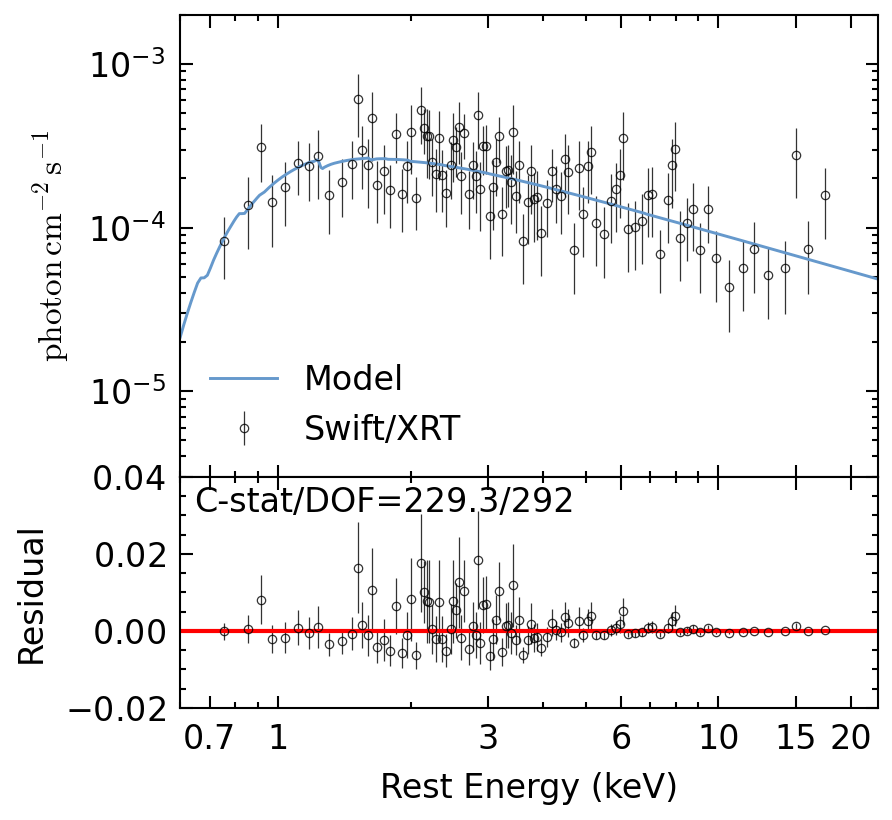

In [55]:
#Ploting spectra for publication
import scienceplots
plt.style.use(["science",'no-latex'])
plt.rcParams.update({
    "font.family": "dejavu sans",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":8,
"legend.fancybox":True})
z=1.285
lw=0.7
numrow=2
numcol=1
colorlst=["#CC6677","#88CCEE","#6699CC"]
fig=plt.figure(figsize=(3,3),dpi=300)
gs = fig.add_gridspec(numrow, numcol,height_ratios=[2,1],hspace=0.0)
axs=gs.subplots(sharex=True)


axs[0].errorbar(np.array(x)*(1+z),y,yerr=yerr,fmt="ko",mfc="none",mew=0.3,ms=2,lw=0.3,alpha=0.8,label="Swift/XRT")
axs[0].plot(np.array(xm)*(1+z),ym,color=colorlst[2],ms=0.5,label="Model",lw=lw)
axs[1].errorbar(np.array(xra)*(1+z),yra,yerr=yraerr,fmt="ko",mfc="none",mew=0.3,ms=2,lw=0.3,alpha=0.8,label="Swift/XRT")

#axs.set_xscale("log")
axs[0].legend()
axs[1].set_ylabel("Residual")

axs[1].text(0.02,0.85,r"C-stat/DOF=229.3/292",transform=axs[1].transAxes)
#axs[1].set_ylim([0,7.5])
axs[1].axhline(0,color="r")
axs[0].set_yscale("log")
axs[0].set_xscale("log")
axs[1].set_xlabel("Rest Energy (keV)")
axs[0].set_ylabel(r"$\rm photon\,cm^{-2}\,s^{-1}$")
axs[0].set_xlim([0.6,23])
axs[0].set_ylim([3e-6,2e-3])
xarray=[0.7,1,3,6,10,15,20]
axs[1].set_xticks(xarray)
axs[1].set_xticklabels(xarray)
axs[1].set_ylim(-0.02,0.04)
#plt.axvline(x=)
#axs=plt.gca()
#axs[0].text(0.05,0.92,r"$n=10^{%s}\,$cm$^{-3}$"%density,transform=axs[0].transAxes)
#axs[0].text(0.05,0.87,r"Log$[\,\xi/$erg$\,$cm$\,$s$^{-1}]=%s $"%logxi,transform=axs[0].transAxes)


plt.savefig("/disk/bifrost/yuanze/multiAGN/PKS2131/Swfit_spec.pdf",dpi=300)